# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 3: Plotting and Data Visualization in Python

Mark Bauer

Table of Contents
=================

   * [1. Importing Libraries](##-1.-Importing-Libraries)
       
       
   * [2. Merging Datasets](#-2.-Merging-Datasets)
       * [2.1 Building Footprints Dataset](##-2.1-Building-Footprints-Dataset)
       * [2.2 Pluto Dataset](##-2.2-Pluto-Dataset)
       
       
   * [3. Seaborn Library](#3-Seaborn-Library)
       * [3.1 Distribution Plots](##-3.1-Plotting-Univariate-Distributions)
           * [3.1.1 Histograms](###-3.1.2-Histograms)
           * [3.1.2 Kernel Density Estimate (KDE) Plot](###-3.1.3-Kernel-Density-Estimate-%28KDE%29-Plot)
           * [3.1.3 Empirical Cumulative Distribution Functions (ECDF)](###-3.1.4-Empirical-Cumulative-Distribution-Functions-%28ECDF%29)
           * [3.1.4 Distribution Plots onto a Facet Grid](###-4.3.4-Distribution-Plots-onto-a-Facet-Grid)
       * [3.2 Relational Plots](###-3.2-Relational-Plots)
           * [3.2.1 Line Plots](###-3.2.1-Line-Plots)
           * [3.2.2 Scatter Plot](###-3.2.2-Scatter-Plot) 
           * [3.2.3 Relational Plots onto a Facet Grid](###-3.2.3-Relational-Plots-onto-a-Facet-Grid)
       * [3.3 Joint Grids](##-4.3-Joint-Grids) 
           * [3.3.1 Scatter Plot](###-3.3.1-Scatter-Plot)
           * [3.3.2 Hexagonal Bin Plots](###-3.3.2-Hexagonal-Bin-Plots)  
           * [3.3.3 Kernel Density Estimate (KDE) Plot](###-3.3.4-Kernel-Density-Estimate-%28KDE%29-Plot)
       * [3.4 Visualizing Pairwise Relationships in a Dataset](##-3.4-Visualizing-Pairwise-Relationships-in-a-Dataset)
       * [3.5 Heat Map](##-3.5-Heat-Map)
       * [3.6 Categorial Plots](##-3.6-Categorial-Plots)
           * [3.6.1 Count Plots](###3.6.1-Count-Plots)
           * [3.6.2 Bar Plots](###-3.6.2-Bar-Plots)
           * [3.6.3 Scatter Plots](###3.6.3-Scatter-Plots)
           * [3.6.4 Swarm Plots](###-3.6.4-Swarm-Plots)
           * [3.6.5 Box Plots](###-3.6.5-Box-Plots)
           * [3.6.6 Boxen Plots](###-3.6.6-Boxen-Plots)
           * [3.6.7 Violin Plots](###-3.6.7-Violin-Plots)
           * [3.6.8 Point Plots](###-3.6.8-Point-Plots)
           * [3.6.9 Facets](###3.6.9-Facets)  
   
   
   * [4. pandas and Matplotlib Libraries](#4-Pandas-and-Matplotlib-Libraries)
       * [4.1 Line Plot](##-4.1-Line-Plot)
       * [4.2 Bar Plot](##-4.2-Bar-Plot)
       * [4.3 Histogram](##-4.3-Histogram)
       * [4.4 Box Plot](##-4.4-Box-Plot)
       * [4.5 Kernel Density Estimate (KDE) Plot](##-4.5-Kernel-Density-Estimate-%28KDE%29-Plot)
       * [4.6 Area Plot](##-4.6-Area-Plot)
       * [4.7 Scatter Plot](##-4.7-Scatter-Plot)
       * [4.8 Hexagonal Bin Plot](##-4.8-Hexagonal-Bin-Plot)
       * [4.9 Pie Plot](##-4.9-Pie-Plot)
       
       
   * [5. Conclusion](#-4.-Conclusion)

**Goal:** In this notebook, we will review various examples of plotting and data visualizations.

**Main Libraries:** 

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# Datasets

## Building Footprints  
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

![building-footprints](images/building-footprints.png)


## PLUTO  
https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-Map-MapPLUTO-/f888-ni5f

![pluto](images/pluto.png)

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats
import requests
import os
from io import BytesIO
import zipfile
from zipfile import ZipFile

%matplotlib inline
sns.set(color_codes=True)

In [2]:
# Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.20.0

numpy 1.19.2
pandas 1.2.1
matplotlib.pyplot 3.3.2
seaborn 0.11.1


# 2. Merging Datasets

## Building Footprints Dataset

In [3]:
# setting the link of our data (a static csv file) as the name 'url'
url = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'
building_footprints = pd.read_csv(url)

building_footprints.head()

the_geom NAME      BIN  \
0  MULTIPOLYGON (((-73.96664570466969 40.62599676...  NaN  3170958   
1  MULTIPOLYGON (((-74.16790202462265 40.63936048...  NaN  5028452   
2  MULTIPOLYGON (((-74.19510813278613 40.55610681...  NaN  5078368   
3  MULTIPOLYGON (((-73.96113466505085 40.57743931...  NaN  3245111   
4  MULTIPOLYGON (((-73.75421559146166 40.75591276...  NaN  4161096   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0      1925.0  08/22/2017 12:00:00 AM  Constructed     96807   29.749853   
1      1965.0  08/22/2017 12:00:00 AM  Constructed    326368   22.630000   
2      1970.0  08/22/2017 12:00:00 AM  Constructed    746627   35.760000   
3      1928.0  08/22/2017 12:00:00 AM  Constructed    786626   37.500000   
4      1950.0  08/22/2017 12:00:00 AM  Constructed    746409   18.015113   

   FEAT_CODE  GROUNDELEV  SHAPE_AREA  SHAPE_LEN      BASE_BBL    MPLUTO_BBL  \
0     2100.0        40.0           0          0  3.065220e+09  3.065220e+09   
1     2100.0        39.0           0          0  5.012640e+09  5.012640e+09   
2     2100.0        51.0           0          0  5.060190e+09  5.060190e+09   
3     2100.0         6.0           0          0  3.086910e+09  3.086910e+09   
4     2100.0        93.0           0          0  4.075020e+09  4.075020e+09   

   GEOMSOURCE  
0  Photogramm  
1  Photogramm  
2  Photogramm  
3  Photogramm  
4  Photogramm

In [4]:
# previewing the last five rows of our dataframe
building_footprints.tail()

the_geom NAME      BIN  \
1084393  MULTIPOLYGON (((-74.15347120534152 40.61912433...  NaN  5110809   
1084394  MULTIPOLYGON (((-74.15349994120652 40.61953681...  NaN  5170869   
1084395  MULTIPOLYGON (((-74.15308079510588 40.61899272...  NaN  5170874   
1084396  MULTIPOLYGON (((-74.15355303940267 40.61869494...  NaN  5110807   
1084397  MULTIPOLYGON (((-74.15349000229811 40.61866105...  NaN  5170856   

         CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  \
1084393      1986.0  08/06/2018 12:00:00 AM  Constructed    646251   
1084394      1986.0  08/06/2018 12:00:00 AM  Constructed   1285982   
1084395      1986.0  08/06/2018 12:00:00 AM  Constructed     27943   
1084396      1986.0  08/06/2018 12:00:00 AM  Constructed    539000   
1084397      1986.0  08/06/2018 12:00:00 AM  Constructed   1285968   

         HEIGHTROOF  FEAT_CODE  GROUNDELEV  SHAPE_AREA  SHAPE_LEN  \
1084393        24.0     2100.0        37.0           0          0   
1084394        25.0     2100.0        38.0           0          0   
1084395        25.0     2100.0        36.0           0          0   
1084396        25.0     2100.0        35.0           0          0   
1084397        25.0     2100.0        35.0           0          0   

             BASE_BBL    MPLUTO_BBL  GEOMSOURCE  
1084393  5.014951e+09  5.014958e+09  Other (Man  
1084394  5.014951e+09  5.014958e+09  Other (Man  
1084395  5.014951e+09  5.014958e+09  Other (Man  
1084396  5.014951e+09  5.014958e+09  Other (Man  
1084397  5.014951e+09  5.014958e+09  Other (Man

In [5]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_footprints.shape

(1084398, 15)

In [6]:
# printing the column names, non-null counts, and data types of our columns
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084398 entries, 0 to 1084397
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1084398 non-null  object 
 1   NAME        1936 non-null     object 
 2   BIN         1084398 non-null  int64  
 3   CNSTRCT_YR  1073524 non-null  float64
 4   LSTMODDATE  1084398 non-null  object 
 5   LSTSTATYPE  1084172 non-null  object 
 6   DOITT_ID    1084398 non-null  int64  
 7   HEIGHTROOF  1081724 non-null  float64
 8   FEAT_CODE   1084390 non-null  float64
 9   GROUNDELEV  1083860 non-null  float64
 10  SHAPE_AREA  1084398 non-null  int64  
 11  SHAPE_LEN   1084398 non-null  int64  
 12  BASE_BBL    1084394 non-null  float64
 13  MPLUTO_BBL  1082100 non-null  float64
 14  GEOMSOURCE  1084171 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 124.1+ MB


In [7]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['MPLUTO_BBL'].isna().sum()

2298

In [8]:
building_footprints = building_footprints.dropna(subset=['MPLUTO_BBL'])

# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['MPLUTO_BBL'].isna().sum()

0

## PLUTO Dataset

In [9]:
# setting the PLUTO dataset link as 'url'
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

# reading in our zipfile data in-memory
content = requests.get(url)
zf = ZipFile(BytesIO(content.content))

# printing files in our zipfile
for item in zf.namelist():
    print("File in zip: "+ item)

File in zip: pluto_20v1.csv
File in zip: PLUTODD20v1.pdf
File in zip: PlutoReadme20v1.pdf


In [10]:
# read our csv data into a dataframe from our zipfile
pluto_data = pd.read_csv(zf.open('pluto_20v1.csv'), low_memory=False)

# previewing the first five rows of our pluto data 
pluto_data.head()

borough  block  lot     cd  ct2010  cb2010  schooldist  council  zipcode  \
0      BK    834   46  307.0   106.0  2001.0        20.0     38.0  11220.0   
1      QN   4042  106  407.0   929.0  3000.0        25.0     19.0  11356.0   
2      BK   4679   17  317.0   866.0  3002.0        18.0     41.0  11203.0   
3      BK   7831    6  318.0   676.0  1002.0        22.0     46.0  11234.0   
4      BK   7831    7  318.0   676.0  1002.0        22.0     46.0  11234.0   

  firecomp  ...  dcasdate  zoningdate  landmkdate basempdate masdate polidate  \
0     L114  ...       NaN         NaN         NaN        NaN     NaN      NaN   
1     E297  ...       NaN         NaN         NaN        NaN     NaN      NaN   
2     L174  ...       NaN         NaN         NaN        NaN     NaN      NaN   
3     L159  ...       NaN         NaN         NaN        NaN     NaN      NaN   
4     L159  ...       NaN         NaN         NaN        NaN     NaN      NaN   

  edesigdate                                               geom dcpedited  \
0        NaN  0106000020E61000000100000001030000000100000005...       NaN   
1        NaN  0106000020E61000000100000001030000000100000007...       NaN   
2        NaN  0106000020E61000000100000001030000000100000006...       NaN   
3        NaN  0106000020E61000000100000001030000000100000005...       NaN   
4        NaN  0106000020E61000000100000001030000000100000005...       NaN   

  notes  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 99 columns]

In [11]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
pluto_data.shape

(859172, 99)

In [12]:
# printing the column names and their non-null count and data types 
pluto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859172 entries, 0 to 859171
Data columns (total 99 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859171 non-null  object 
 1   block                 859172 non-null  int64  
 2   lot                   859172 non-null  int64  
 3   cd                    858186 non-null  float64
 4   ct2010                858186 non-null  float64
 5   cb2010                858186 non-null  float64
 6   schooldist            857481 non-null  float64
 7   council               858185 non-null  float64
 8   zipcode               857449 non-null  float64
 9   firecomp              857464 non-null  object 
 10  policeprct            857473 non-null  float64
 11  healtharea            857474 non-null  float64
 12  sanitboro             857270 non-null  float64
 13  sanitsub              857150 non-null  object 
 14  address               858772 non-null  object 
 15  

In [13]:
# printing the columns 
pluto_data.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'sanitboro', 'sanitsub', 'address', 'zonedist1', 'zonedist2',
       'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2',
       'spdist3', 'ltdheight', 'splitzone', 'bldgclass', 'landuse',
       'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea',
       'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea',
       'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront',
       'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype', 'bsmtcode',
       'assessland', 'assesstot', 'exempttot', 'yearbuilt', 'yearalter1',
       'yearalter2', 'histdist', 'landmark', 'builtfar', 'residfar', 'commfar',
       'facilfar', 'borocode', 'bbl', 'condono', 'tract2010', 'xcoord',
       'ycoord', 'latitude', 'longitude', '

In [14]:
# saving only the columns we want in our dataframe
pluto_data = pluto_data[
    ['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
    'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
    'bldgclass', 'landuse',
    'ownertype', 
    'facilfar', 'borocode', 'bbl', 'tract2010', 'xcoord',
    'ycoord', 'latitude', 'longitude',
    'plutomapid',
    'sanitdistrict', 'healthcenterdistrict', 'firm07_flag', 'pfirm15_flag']]

pluto_data.head()

borough  block  lot     cd  ct2010  cb2010  schooldist  council  zipcode  \
0      BK    834   46  307.0   106.0  2001.0        20.0     38.0  11220.0   
1      QN   4042  106  407.0   929.0  3000.0        25.0     19.0  11356.0   
2      BK   4679   17  317.0   866.0  3002.0        18.0     41.0  11203.0   
3      BK   7831    6  318.0   676.0  1002.0        22.0     46.0  11234.0   
4      BK   7831    7  318.0   676.0  1002.0        22.0     46.0  11234.0   

  firecomp  ...  tract2010     xcoord    ycoord   latitude  longitude  \
0     L114  ...      106.0   982211.0  171707.0  40.637972 -74.007347   
1     E297  ...      929.0  1026895.0  225880.0  40.786562 -73.846003   
2     L174  ...      866.0  1004527.0  177269.0  40.653216 -73.926923   
3     L159  ...      676.0  1004804.0  166580.0  40.623876 -73.925958   
4     L159  ...      676.0  1004784.0  166579.0  40.623874 -73.926030   

   plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  pfirm15_flag  
0           1            7.0                  39.0          NaN           NaN  
1           1            7.0                  43.0          NaN           NaN  
2           1           17.0                  35.0          NaN           NaN  
3           1           18.0                  35.0          NaN           NaN  
4           1           18.0                  35.0          NaN           NaN  

[5 rows x 28 columns]

In [15]:
# printing the column names and their non-null count and data types 
pluto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859172 entries, 0 to 859171
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859171 non-null  object 
 1   block                 859172 non-null  int64  
 2   lot                   859172 non-null  int64  
 3   cd                    858186 non-null  float64
 4   ct2010                858186 non-null  float64
 5   cb2010                858186 non-null  float64
 6   schooldist            857481 non-null  float64
 7   council               858185 non-null  float64
 8   zipcode               857449 non-null  float64
 9   firecomp              857464 non-null  object 
 10  policeprct            857473 non-null  float64
 11  healtharea            857474 non-null  float64
 12  bldgclass             858772 non-null  object 
 13  landuse               856169 non-null  float64
 14  ownertype             31873 non-null   object 
 15  

In [16]:
# joining/merging the pluto data with the building footprints data and saving as a new dataframe
building_footprints = building_footprints.merge(pluto_data, 
                                                left_on='MPLUTO_BBL', 
                                                right_on='bbl')

building_footprints = building_footprints.reset_index(drop=True)

building_footprints.head()

the_geom NAME      BIN  \
0  MULTIPOLYGON (((-73.96664570466969 40.62599676...  NaN  3170958   
1  MULTIPOLYGON (((-74.16790202462265 40.63936048...  NaN  5028452   
2  MULTIPOLYGON (((-74.19510813278613 40.55610681...  NaN  5078368   
3  MULTIPOLYGON (((-73.96113466505085 40.57743931...  NaN  3245111   
4  MULTIPOLYGON (((-73.75421559146166 40.75591276...  NaN  4161096   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0      1925.0  08/22/2017 12:00:00 AM  Constructed     96807   29.749853   
1      1965.0  08/22/2017 12:00:00 AM  Constructed    326368   22.630000   
2      1970.0  08/22/2017 12:00:00 AM  Constructed    746627   35.760000   
3      1928.0  08/22/2017 12:00:00 AM  Constructed    786626   37.500000   
4      1950.0  08/22/2017 12:00:00 AM  Constructed    746409   18.015113   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
0     2100.0        40.0  ...      456.0   993487.0  167356.0  40.626025   
1     2100.0        39.0  ...    31902.0   937645.0  172239.0  40.639310   
2     2100.0        51.0  ...    17010.0   930013.0  141940.0  40.556102   
3     2100.0         6.0  ...    36002.0   995038.0  149646.0  40.577413   
4     2100.0        93.0  ...   138501.0  1052332.0  214745.0  40.755840   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
0 -73.966724          1           12.0                  35.0          NaN   
1 -74.167926          1            1.0                  51.0          NaN   
2 -74.195182          1            3.0                  51.0          NaN   
3 -73.961165          1           13.0                  37.0          NaN   
4 -73.754259          1           11.0                  43.0          NaN   

   pfirm15_flag  
0           NaN  
1           NaN  
2           NaN  
3           1.0  
4           NaN  

[5 rows x 43 columns]

In [17]:
# printing the column names and their non-null count and data types 
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080442 entries, 0 to 1080441
Data columns (total 43 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   the_geom              1080442 non-null  object 
 1   NAME                  1907 non-null     object 
 2   BIN                   1080442 non-null  int64  
 3   CNSTRCT_YR            1070008 non-null  float64
 4   LSTMODDATE            1080442 non-null  object 
 5   LSTSTATYPE            1080253 non-null  object 
 6   DOITT_ID              1080442 non-null  int64  
 7   HEIGHTROOF            1077968 non-null  float64
 8   FEAT_CODE             1080434 non-null  float64
 9   GROUNDELEV            1079964 non-null  float64
 10  SHAPE_AREA            1080442 non-null  int64  
 11  SHAPE_LEN             1080442 non-null  int64  
 12  BASE_BBL              1080442 non-null  float64
 13  MPLUTO_BBL            1080442 non-null  float64
 14  GEOMSOURCE            1080230 non-

In [18]:
# printing dimensions (rows and columns) of our data
building_footprints.shape

(1080442, 43)

# Analyzing only buildings built between 1945 and 2020

In [19]:
# returning only building built between 1945 and 2020
building_footprints = building_footprints.loc[building_footprints['CNSTRCT_YR'].between(1945, 2020)]

# filling null values with '0'
building_footprints['pfirm15_flag'] = building_footprints['pfirm15_flag'].fillna(value=0)
building_footprints['firm07_flag'] = building_footprints['firm07_flag'].fillna(value=0)
                               
# printing number of rows in data    
print(len(building_footprints))
building_footprints.head()

382677


the_geom NAME      BIN  \
1  MULTIPOLYGON (((-74.16790202462265 40.63936048...  NaN  5028452   
2  MULTIPOLYGON (((-74.19510813278613 40.55610681...  NaN  5078368   
4  MULTIPOLYGON (((-73.75421559146166 40.75591276...  NaN  4161096   
5  MULTIPOLYGON (((-74.14644228489016 40.58885592...  NaN  5122427   
8  MULTIPOLYGON (((-74.221228292902 40.5303177260...  NaN  5133580   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
1      1965.0  08/22/2017 12:00:00 AM  Constructed    326368   22.630000   
2      1970.0  08/22/2017 12:00:00 AM  Constructed    746627   35.760000   
4      1950.0  08/22/2017 12:00:00 AM  Constructed    746409   18.015113   
5      1997.0  08/22/2017 12:00:00 AM  Constructed    933599   32.500000   
8      2001.0  08/22/2017 12:00:00 AM  Constructed    937499   27.310000   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
1     2100.0        39.0  ...    31902.0   937645.0  172239.0  40.639310   
2     2100.0        51.0  ...    17010.0   930013.0  141940.0  40.556102   
4     2100.0        93.0  ...   138501.0  1052332.0  214745.0  40.755840   
5     2100.0       175.0  ...    27301.0   943549.0  153837.0  40.588830   
8     2100.0       105.0  ...      226.0   922741.0  132534.0  40.530237   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
1 -74.167926          1            1.0                  51.0          0.0   
2 -74.195182          1            3.0                  51.0          0.0   
4 -73.754259          1           11.0                  43.0          0.0   
5 -74.146542          1            2.0                  51.0          0.0   
8 -74.221266          1            3.0                  51.0          0.0   

   pfirm15_flag  
1           0.0  
2           0.0  
4           0.0  
5           0.0  
8           0.0  

[5 rows x 43 columns]

# 3. Plotting with Seaborn 

## Distribution Plots

### Histograms

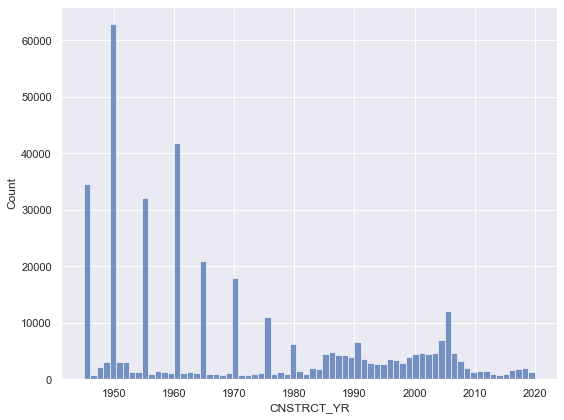

In [20]:
plt.figure(figsize=(8,6))

sns.histplot(building_footprints['CNSTRCT_YR'])

plt.tight_layout()
plt.savefig('figures/3-1-1-a')

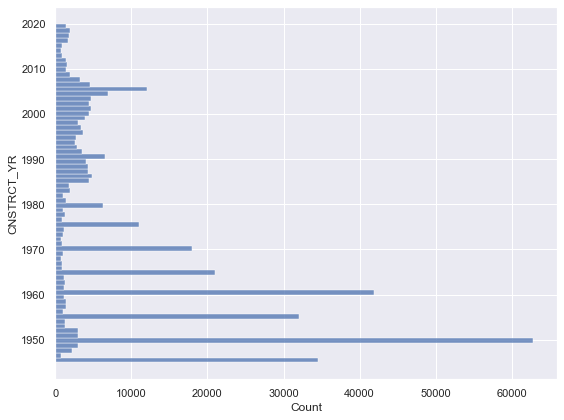

In [21]:
plt.figure(figsize=(8,6))

sns.histplot(y=building_footprints['CNSTRCT_YR'])

plt.tight_layout()
plt.savefig('figures/3-1-1-b')

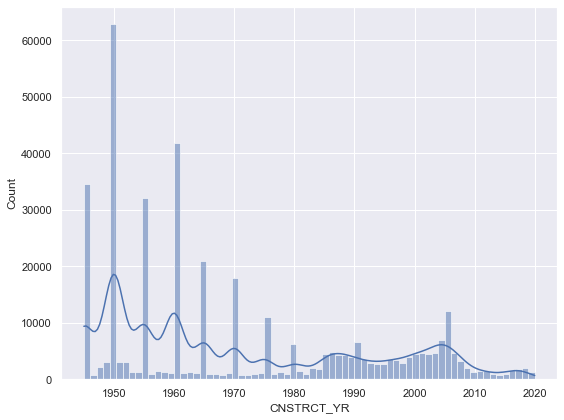

In [22]:
plt.figure(figsize=(8,6))

sns.histplot(building_footprints['CNSTRCT_YR'],
             kde=True)

plt.tight_layout()
plt.savefig('figures/3-1-1-c')

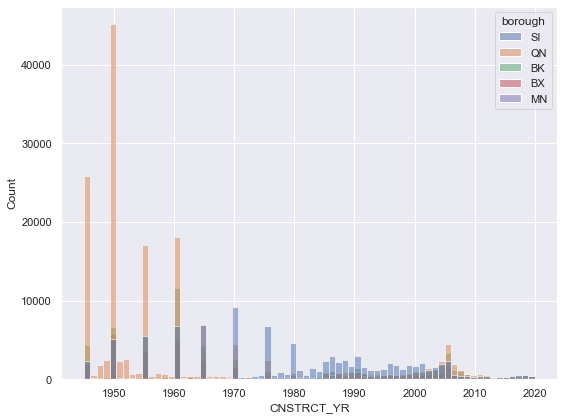

In [23]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             hue='borough')

plt.tight_layout()
plt.savefig('figures/3-1-1-d')

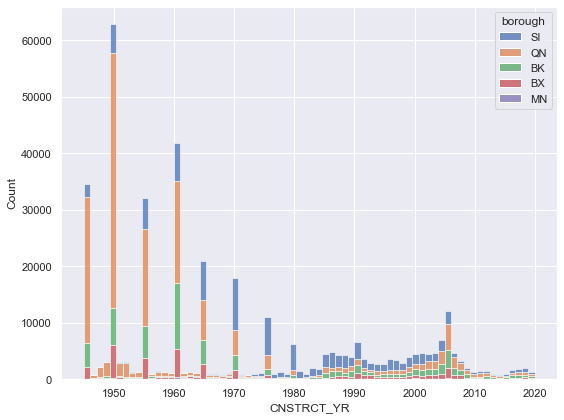

In [24]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             hue='borough',
             multiple="stack")

plt.tight_layout()
plt.savefig('figures/3-1-1-e')

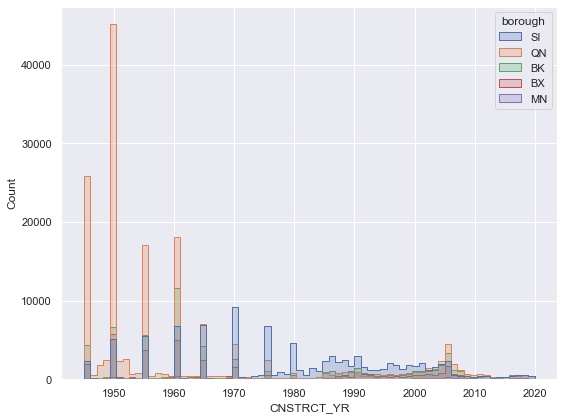

In [25]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             hue='borough',
             element="step")

plt.tight_layout()
plt.savefig('figures/3-1-1-f')

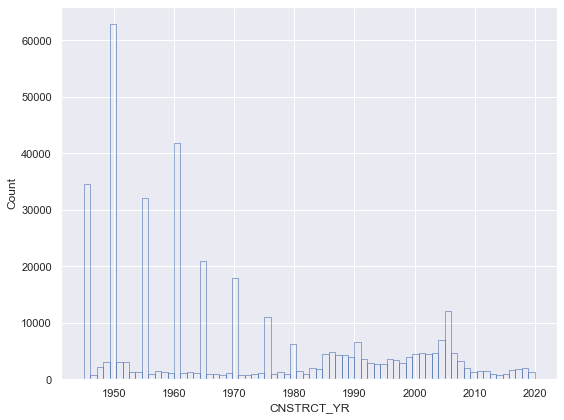

In [26]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             fill=False)

plt.tight_layout()
plt.savefig('figures/3-1-1-g')

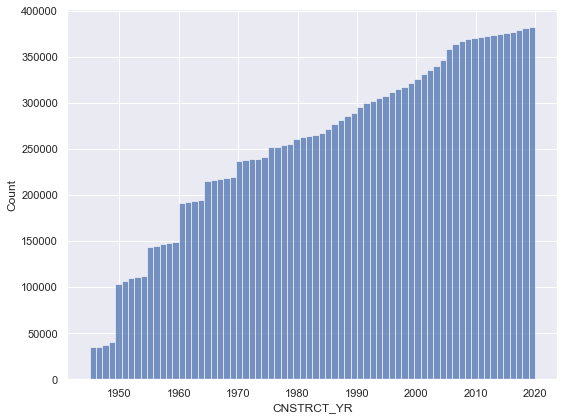

In [27]:
plt.figure(figsize=(8,6))

sns.histplot(building_footprints['CNSTRCT_YR'],
            cumulative=True)

plt.tight_layout()
plt.savefig('figures/3-1-1-h')

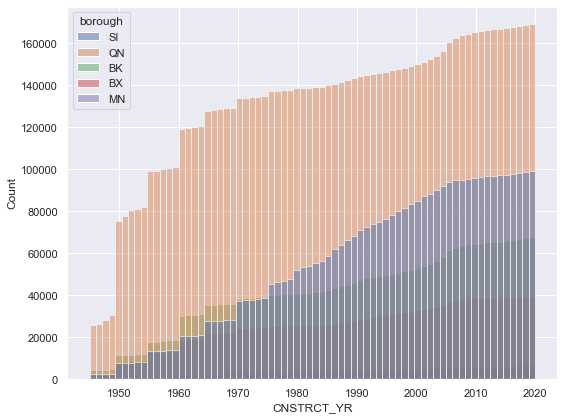

In [28]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints,
             x = 'CNSTRCT_YR',
             hue='borough',
             cumulative=True)

plt.tight_layout()
plt.savefig('figures/3-1-1-i')

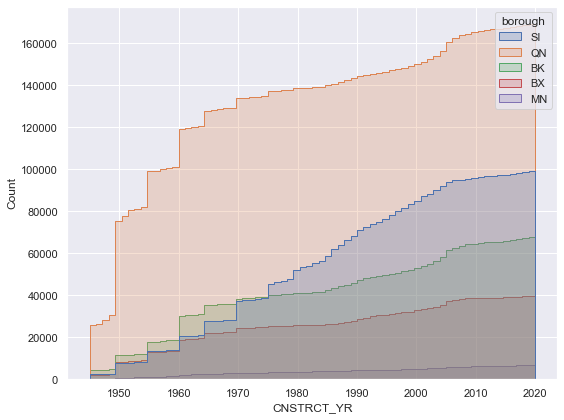

In [29]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints,
             x = 'CNSTRCT_YR',
             hue='borough',
             cumulative=True,
             element="step")

plt.tight_layout()
plt.savefig('figures/3-1-1-j')

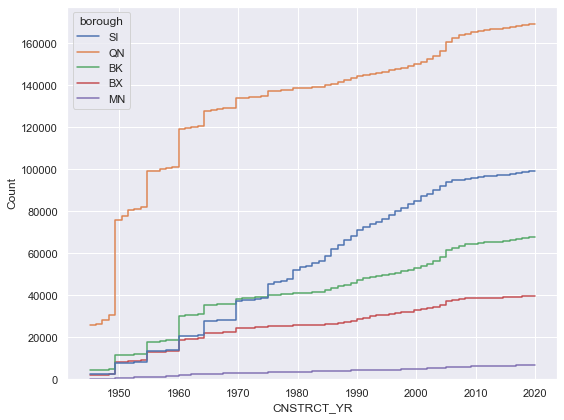

In [30]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints,
             x = 'CNSTRCT_YR',
             hue='borough',
             cumulative=True,
             element="step",
             fill=False)

plt.tight_layout()
plt.savefig('figures/3-1-1-k')

### Kernel Density Estimation (KDE) Plots

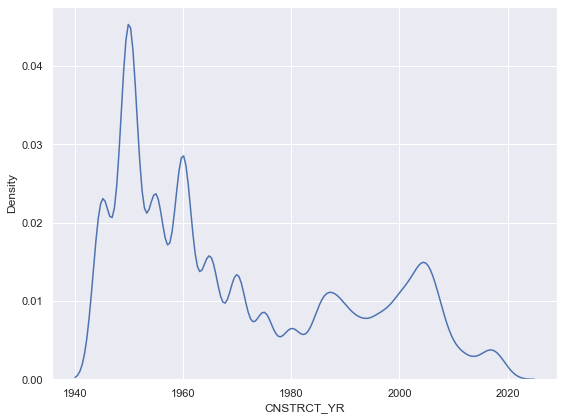

In [31]:
plt.figure(figsize=(8,6))

sns.kdeplot(building_footprints['CNSTRCT_YR'])

plt.tight_layout()
plt.savefig('figures/3-1-2-a')

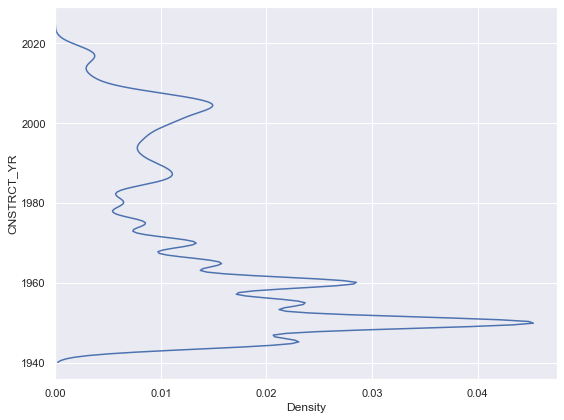

In [32]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            y='CNSTRCT_YR')

plt.tight_layout()
plt.savefig('figures/3-1-2-b')

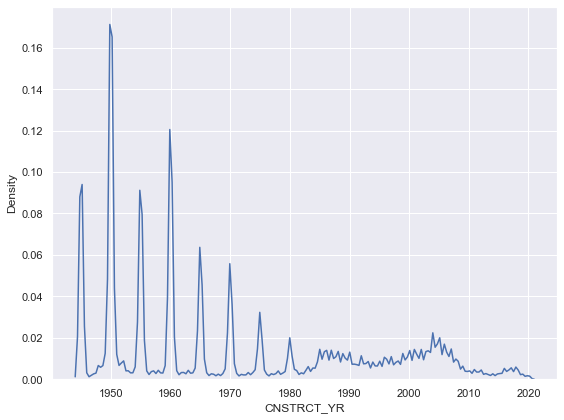

In [33]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            bw_adjust=.2)

plt.tight_layout()
plt.savefig('figures/3-1-2-c')

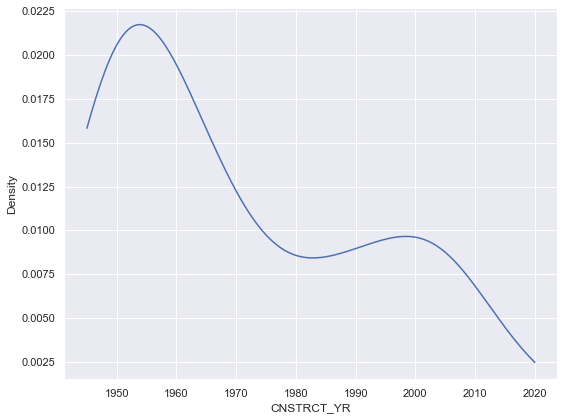

In [34]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            bw_adjust=5, 
            cut=0)

plt.tight_layout()
plt.savefig('figures/3-1-2-d')

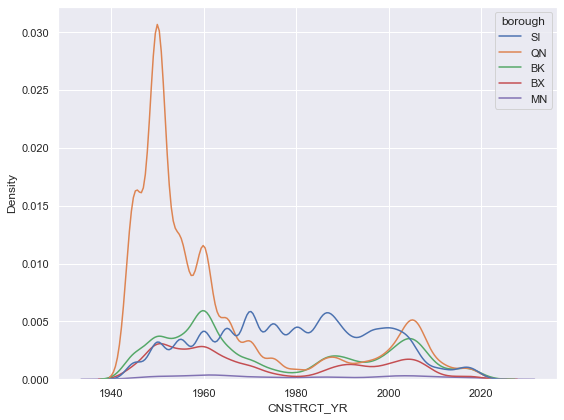

In [35]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough')

plt.tight_layout()
plt.savefig('figures/3-1-2-e')

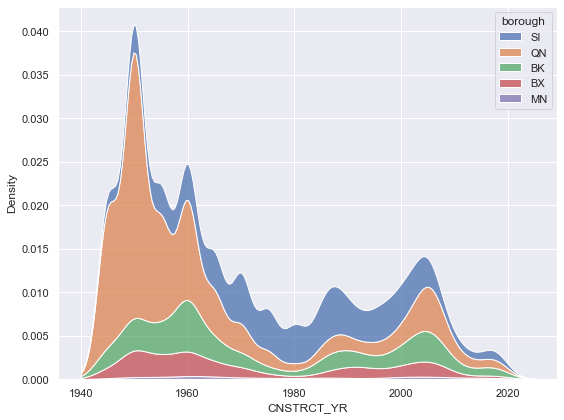

In [36]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough', 
            multiple='stack')

plt.tight_layout()
plt.savefig('figures/3-1-2-f')

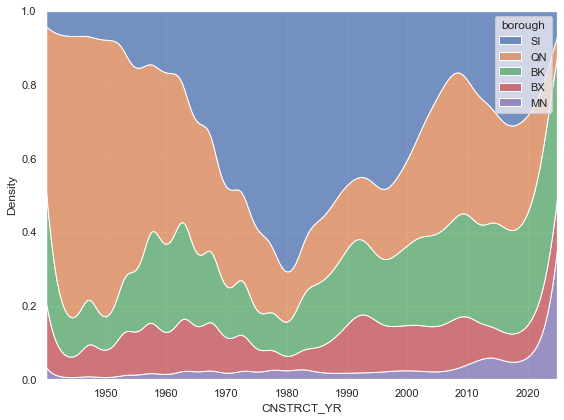

In [37]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough', 
            multiple='fill')

plt.tight_layout()
plt.savefig('figures/3-1-2-g')

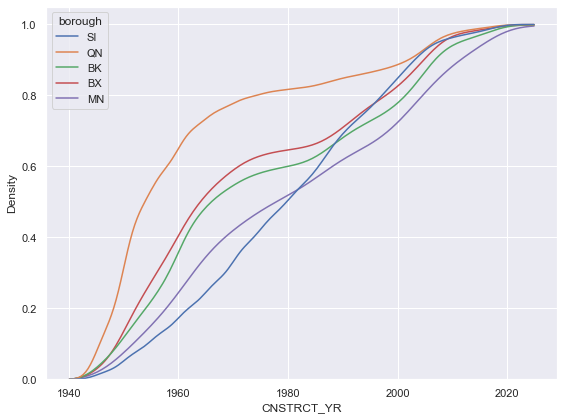

In [38]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough', 
            cumulative=True, 
            common_norm=False, 
            common_grid=True)

plt.tight_layout()
plt.savefig('figures/3-1-2-h')

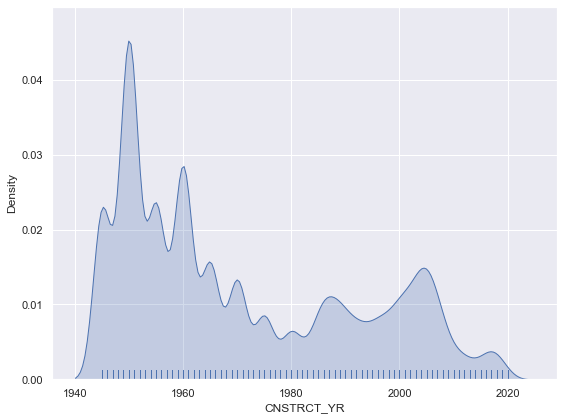

In [39]:
plt.figure(figsize=(8,6))

sns.kdeplot(building_footprints['CNSTRCT_YR'], 
            shade=True)

sns.rugplot(building_footprints['CNSTRCT_YR'])

plt.tight_layout()
plt.savefig('figures/3-1-2-i')

### Empirical Cumulative Distribution Functions (ECDF)

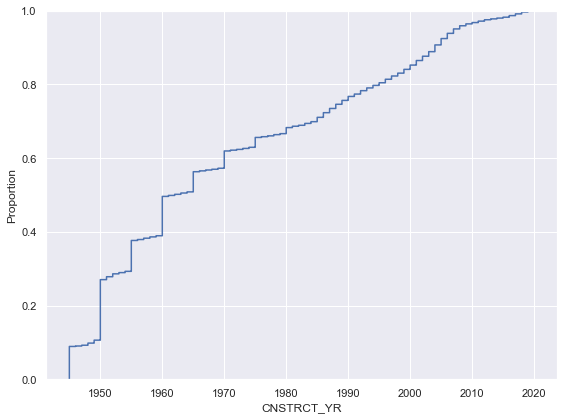

In [40]:
plt.figure(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR")

plt.tight_layout()
plt.savefig('figures/3-1-3-a')

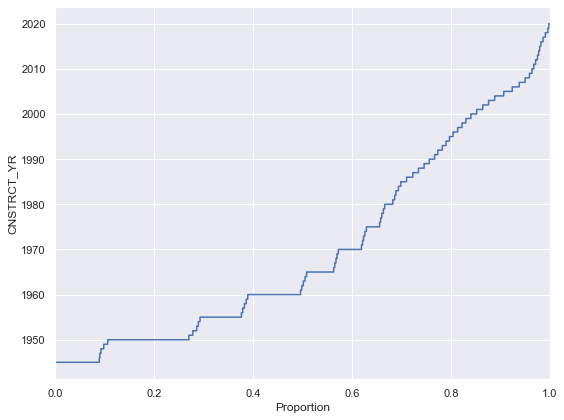

In [41]:
plt.figure(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             y="CNSTRCT_YR")

plt.tight_layout()
plt.savefig('figures/3-1-3-b')

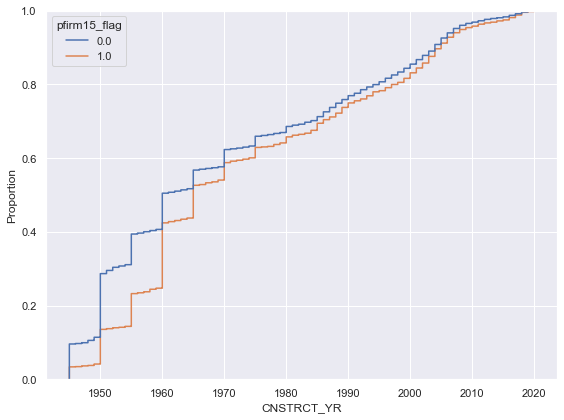

In [42]:
plt.figure(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             hue='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-1-3-c')

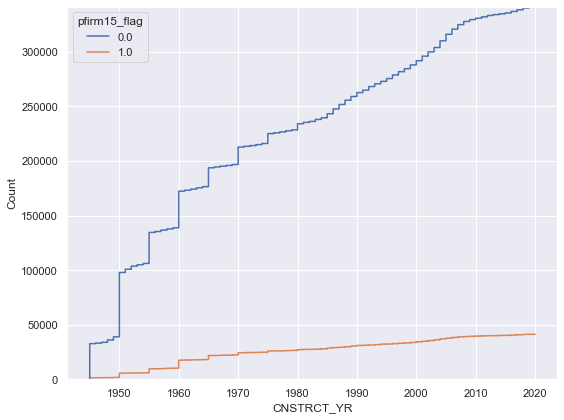

In [43]:
plt.figure(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             hue='pfirm15_flag',
             stat="count")

plt.tight_layout()
plt.savefig('figures/3-1-3-d')

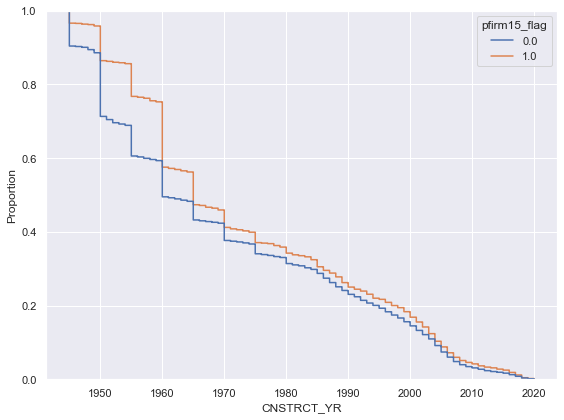

In [44]:
plt.figure(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             hue='pfirm15_flag',
             complementary=True)

plt.tight_layout()
plt.savefig('figures/3-1-3-e')

### Distribution Plots onto a Facet Grid

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


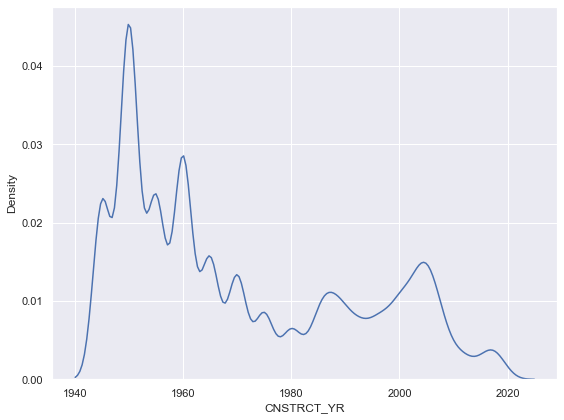

In [45]:
plt.figure(figsize=(8,6))

sns.distplot(building_footprints['CNSTRCT_YR'], 
             hist=False)

plt.tight_layout()
plt.savefig('figures/3-1-4-a')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


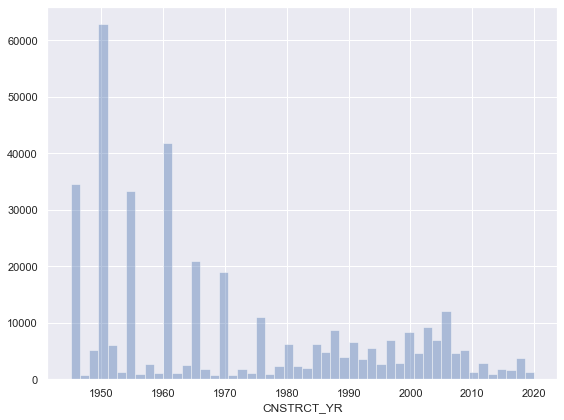

In [46]:
plt.figure(figsize=(8,6))


sns.distplot(building_footprints['CNSTRCT_YR'], 
             kde=False, 
             rug=False)

plt.tight_layout()
plt.savefig('figures/3-1-4-b')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


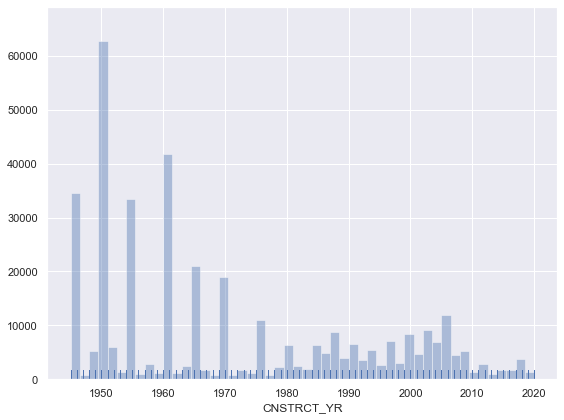

In [47]:
plt.figure(figsize=(8,6))

sns.distplot(building_footprints['CNSTRCT_YR'],
             kde=False, 
             rug=True)

plt.tight_layout()
plt.savefig('figures/3-1-4-c')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


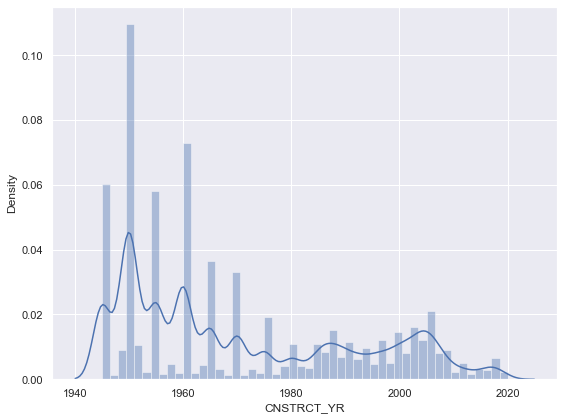

In [48]:
plt.figure(figsize=(8,6))

sns.distplot(building_footprints['CNSTRCT_YR'])

plt.tight_layout()
plt.savefig('figures/3-1-4-d')

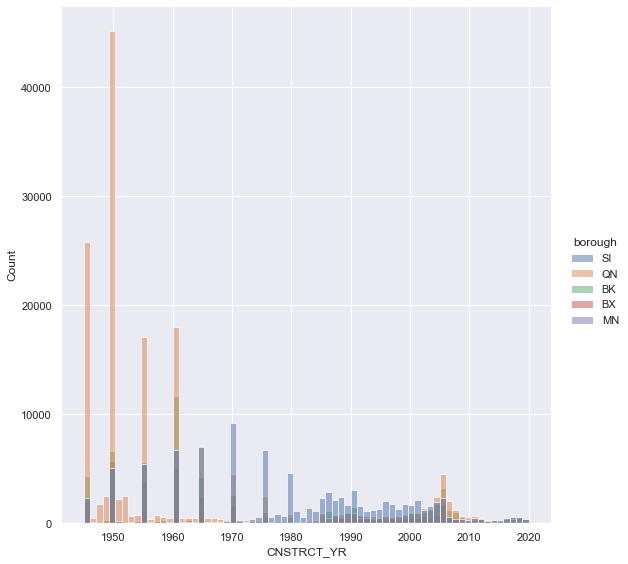

In [49]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="borough", 
            kind="hist",
            height=8,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-1-4-e', bbox_inches='tight')

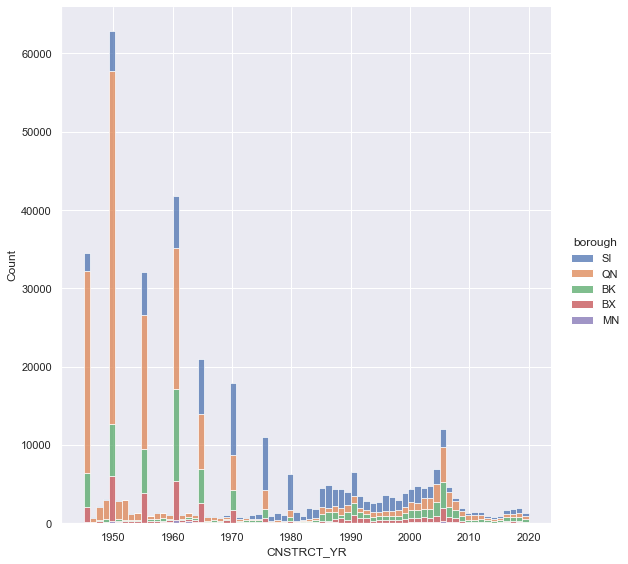

In [50]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="borough", 
            multiple="stack",
            height=8,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-1-4-f', bbox_inches='tight')

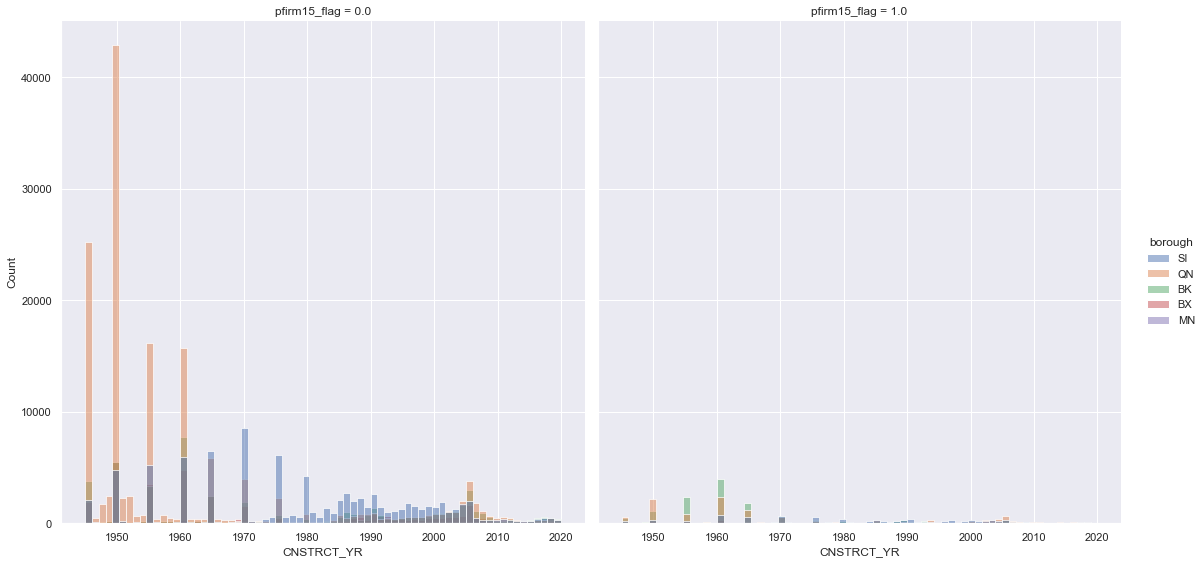

In [51]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="borough", 
            col="pfirm15_flag", 
            kind="hist",
            height=8,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-1-4-g', bbox_inches='tight')

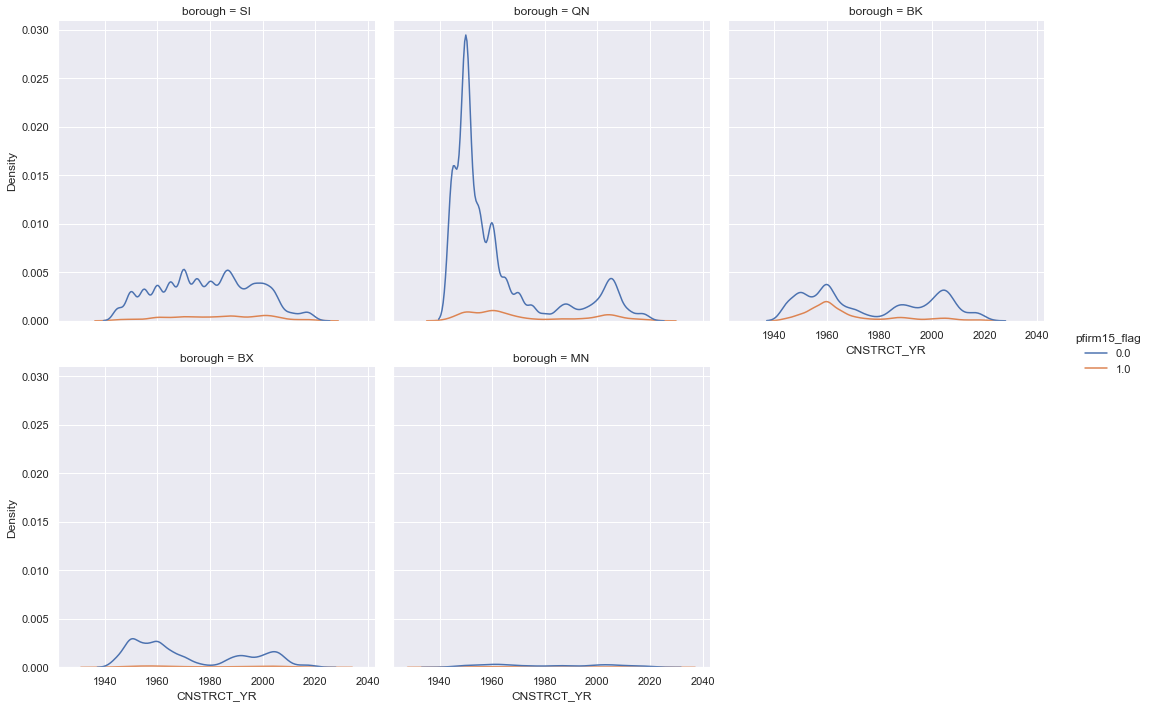

In [52]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="pfirm15_flag", 
            col="borough", 
            kind="kde",
            col_wrap=3,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-1-4-h', bbox_inches='tight')

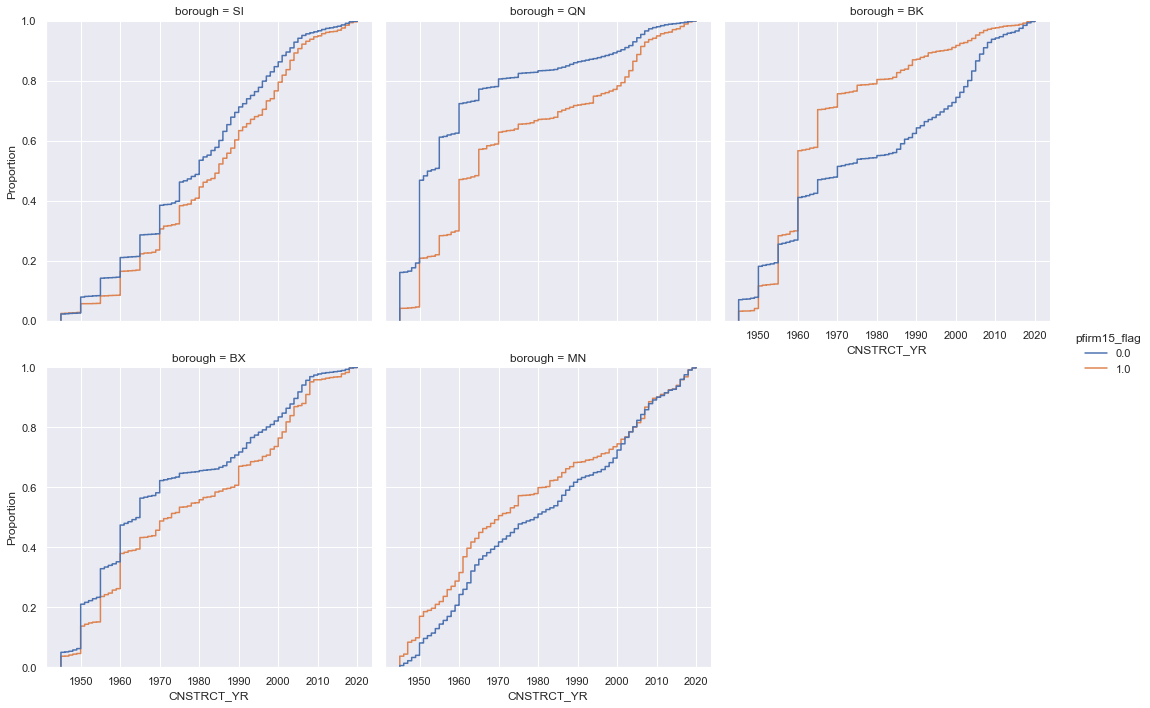

In [53]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="pfirm15_flag", 
            col="borough", 
            kind="ecdf",
            col_wrap=3,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-1-4-i', bbox_inches='tight')

## Relational Plots

### Line Plot

In [54]:
building_footprints.head()

the_geom NAME      BIN  \
1  MULTIPOLYGON (((-74.16790202462265 40.63936048...  NaN  5028452   
2  MULTIPOLYGON (((-74.19510813278613 40.55610681...  NaN  5078368   
4  MULTIPOLYGON (((-73.75421559146166 40.75591276...  NaN  4161096   
5  MULTIPOLYGON (((-74.14644228489016 40.58885592...  NaN  5122427   
8  MULTIPOLYGON (((-74.221228292902 40.5303177260...  NaN  5133580   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
1      1965.0  08/22/2017 12:00:00 AM  Constructed    326368   22.630000   
2      1970.0  08/22/2017 12:00:00 AM  Constructed    746627   35.760000   
4      1950.0  08/22/2017 12:00:00 AM  Constructed    746409   18.015113   
5      1997.0  08/22/2017 12:00:00 AM  Constructed    933599   32.500000   
8      2001.0  08/22/2017 12:00:00 AM  Constructed    937499   27.310000   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
1     2100.0        39.0  ...    31902.0   937645.0  172239.0  40.639310   
2     2100.0        51.0  ...    17010.0   930013.0  141940.0  40.556102   
4     2100.0        93.0  ...   138501.0  1052332.0  214745.0  40.755840   
5     2100.0       175.0  ...    27301.0   943549.0  153837.0  40.588830   
8     2100.0       105.0  ...      226.0   922741.0  132534.0  40.530237   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
1 -74.167926          1            1.0                  51.0          0.0   
2 -74.195182          1            3.0                  51.0          0.0   
4 -73.754259          1           11.0                  43.0          0.0   
5 -74.146542          1            2.0                  51.0          0.0   
8 -74.221266          1            3.0                  51.0          0.0   

   pfirm15_flag  
1           0.0  
2           0.0  
4           0.0  
5           0.0  
8           0.0  

[5 rows x 43 columns]

In [55]:
by_year = building_footprints.groupby('CNSTRCT_YR')[['DOITT_ID']].count()
by_year.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
by_year = by_year.reset_index()
by_year['CNSTRCT_YR'] = by_year['CNSTRCT_YR'].astype(int)

by_year.head()

CNSTRCT_YR  count
0        1945  34105
1        1946    467
2        1947    813
3        1948   2198
4        1949   3061

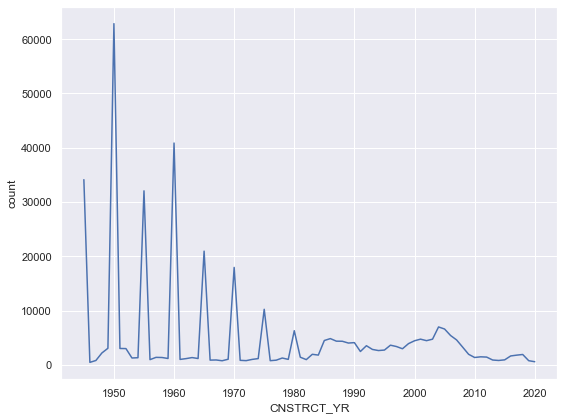

In [56]:
plt.figure(figsize=(8,6))

sns.lineplot(data=by_year, 
             x="CNSTRCT_YR", 
             y="count")

plt.tight_layout()
plt.savefig('figures/3-2-1-a')

In [57]:
line_pivot = pd.pivot_table(building_footprints, 
                      values='DOITT_ID', 
                      index=['CNSTRCT_YR'], 
                      columns = ['borough'], 
                      aggfunc='count')

line_pivot.head()

borough       BK    BX  MN     QN    SI
CNSTRCT_YR                             
1945.0      4209  1948  76  25611  2261
1946.0        95    53  51    187    81
1947.0        34    88  94    493   104
1948.0       150   166  68   1759    55
1949.0       275   174  50   2491    71

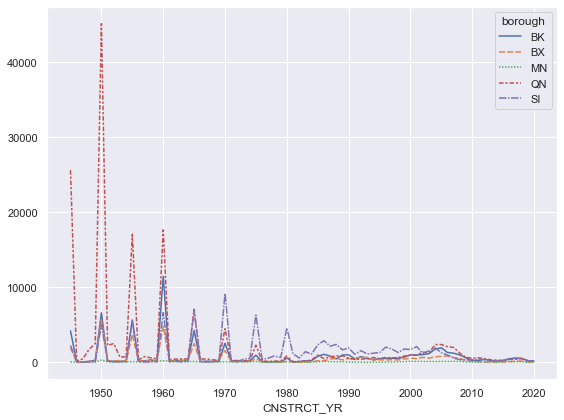

In [58]:
plt.figure(figsize=(8,6))

sns.lineplot(data=line_pivot)

plt.tight_layout()
plt.savefig('figures/3-2-1-b')

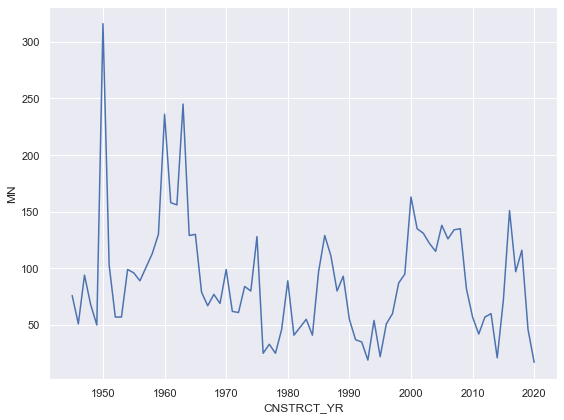

In [59]:
plt.figure(figsize=(8,6))

sns.lineplot(data=line_pivot['MN'])

plt.tight_layout()
plt.savefig('figures/3-2-1-c')

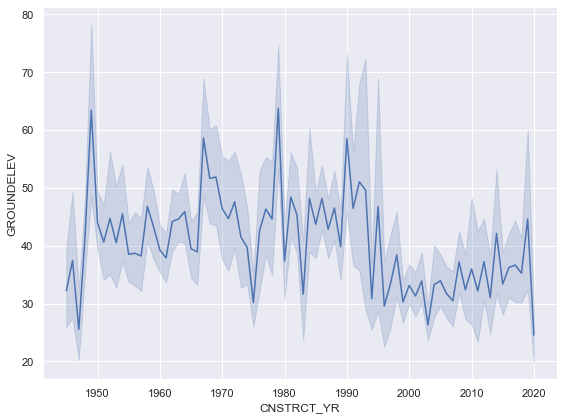

In [60]:
plt.figure(figsize=(8,6))

sns.lineplot(data=building_footprints.loc[building_footprints['borough'] == 'MN'], 
             x="CNSTRCT_YR", 
             y="GROUNDELEV")

plt.tight_layout()
plt.savefig('figures/3-2-1-d')

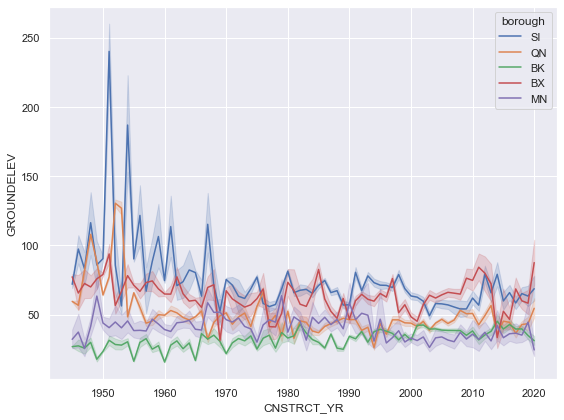

In [61]:
plt.figure(figsize=(8,6))

sns.lineplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV",
             hue='borough')

plt.tight_layout()
plt.savefig('figures/3-2-1-e')

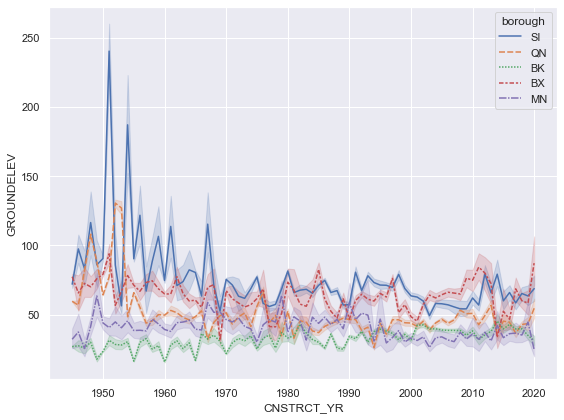

In [62]:
plt.figure(figsize=(8,6))

sns.lineplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV",
             hue='borough',
             style='borough')

plt.tight_layout()
plt.savefig('figures/3-2-1-f')

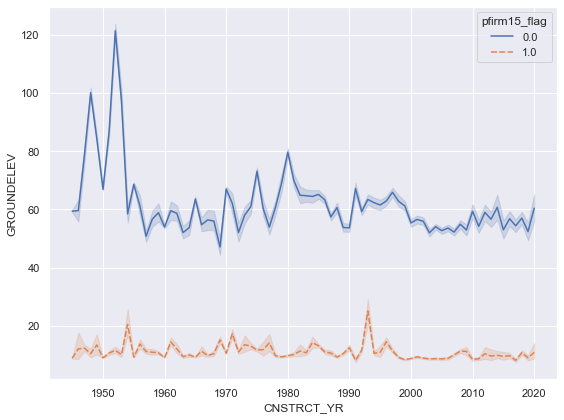

In [63]:
plt.figure(figsize=(8,6))

sns.lineplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV",
             hue='pfirm15_flag',
             style='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-2-1-g')

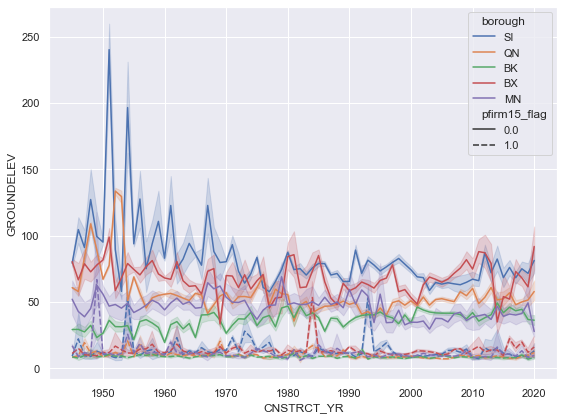

In [64]:
plt.figure(figsize=(8,6))

sns.lineplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV",
             hue='borough',
             style='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-2-1-h')

<Figure size 576x432 with 0 Axes>

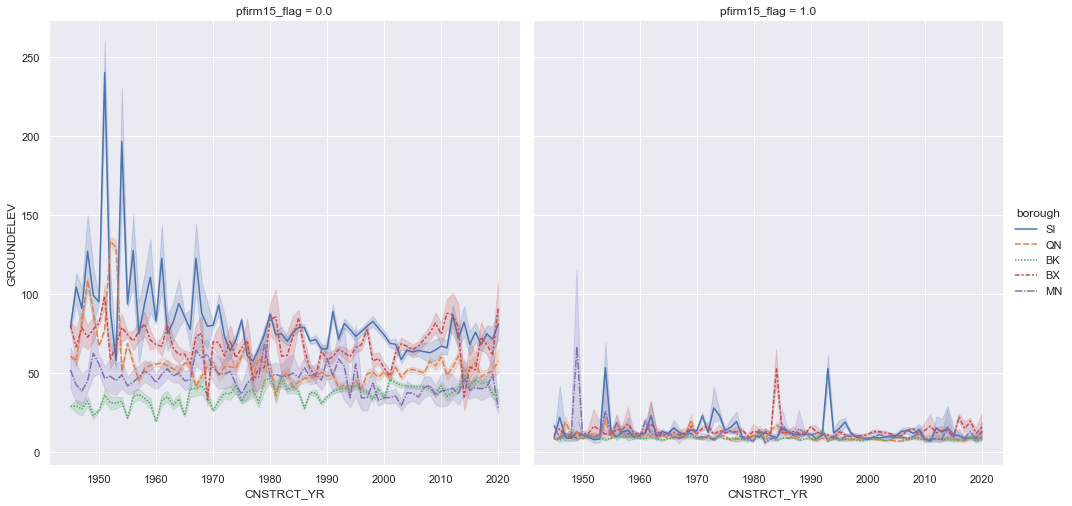

In [65]:
plt.figure(figsize=(8,6))

sns.relplot(data=building_footprints, 
            x="CNSTRCT_YR", 
            y="GROUNDELEV",
            col="pfirm15_flag", 
            hue="borough", 
            style="borough",
            kind="line",
            height = 7,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-2-1-i', bbox_inches='tight')

### Scatter Plots

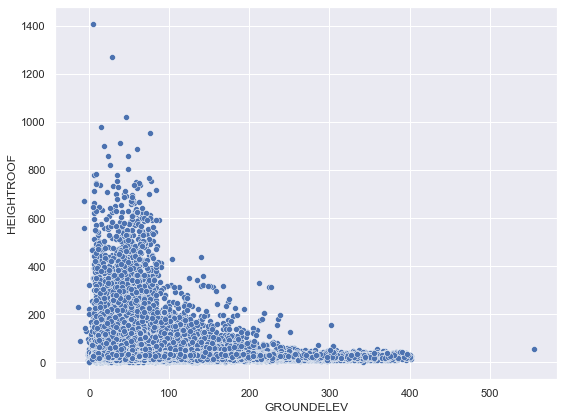

In [66]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'])

plt.tight_layout()
plt.savefig('figures/3-2-2-a')

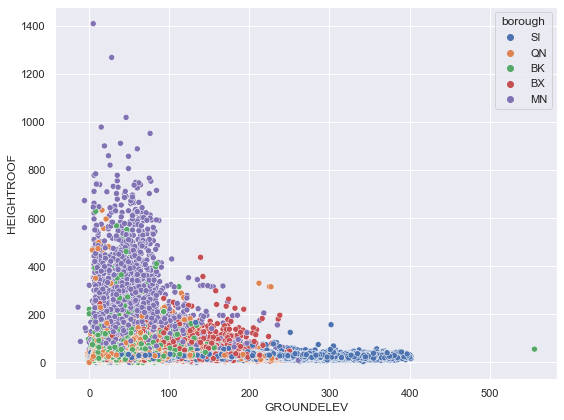

In [67]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="borough")

plt.tight_layout()
plt.savefig('figures/3-2-2-b')

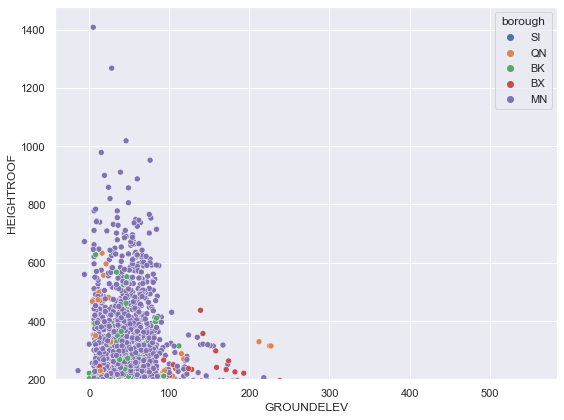

In [68]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="borough")

plt.ylim(bottom=200)
plt.tight_layout()
plt.savefig('figures/3-2-2-c')

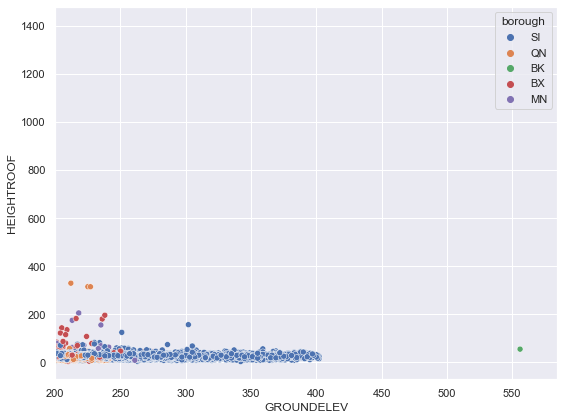

In [69]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="borough")

plt.xlim(left=200)
plt.tight_layout()
plt.savefig('figures/3-2-2-d')

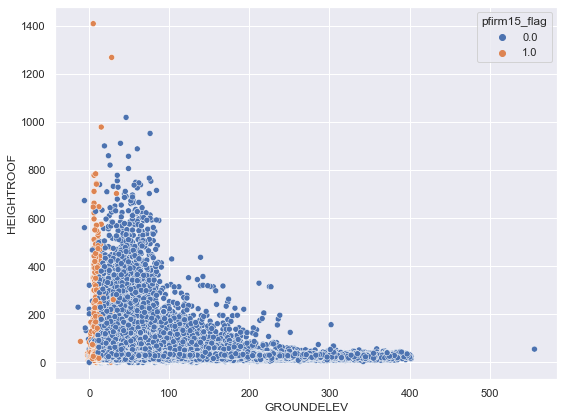

In [70]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag")

plt.tight_layout()
plt.savefig('figures/3-2-2-e')

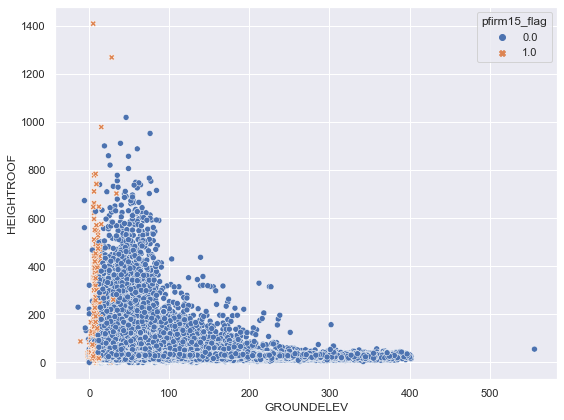

In [71]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag", 
                style="pfirm15_flag")

plt.tight_layout()
plt.savefig('figures/3-2-2-f')

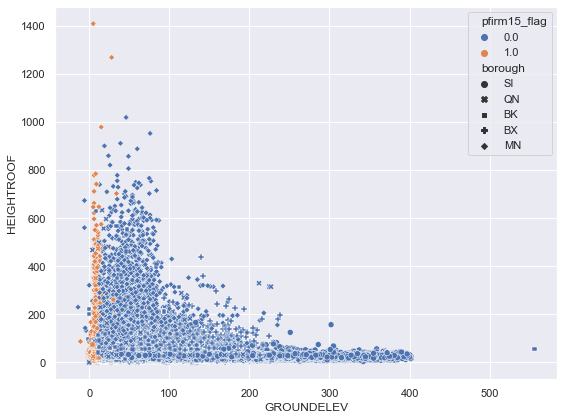

In [72]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag", 
                style="borough")

plt.tight_layout()
plt.savefig('figures/3-2-2-g')

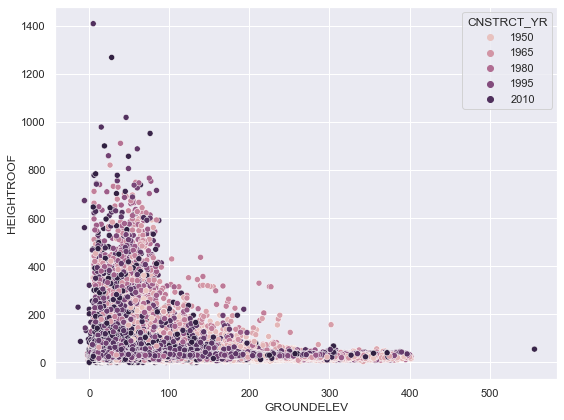

In [73]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="CNSTRCT_YR")

plt.tight_layout()
plt.savefig('figures/3-2-2-h')

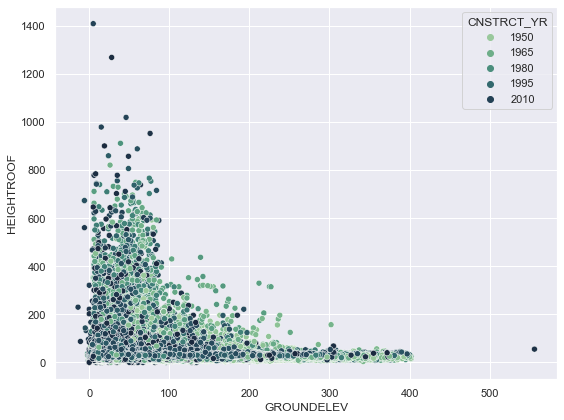

In [74]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="CNSTRCT_YR", 
                palette="ch:r=-.5,l=.75")

plt.tight_layout()
plt.savefig('figures/3-2-2-i')

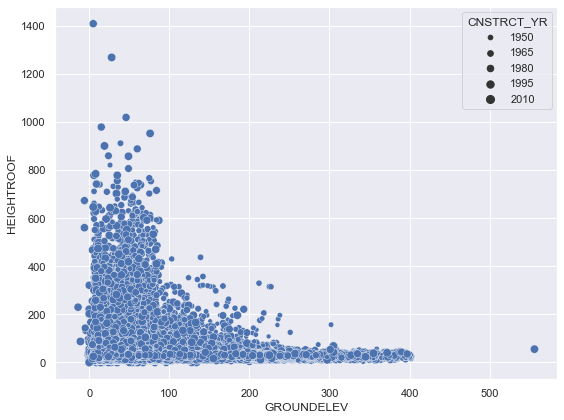

In [75]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                size="CNSTRCT_YR")

plt.tight_layout()
plt.savefig('figures/3-2-2-j')

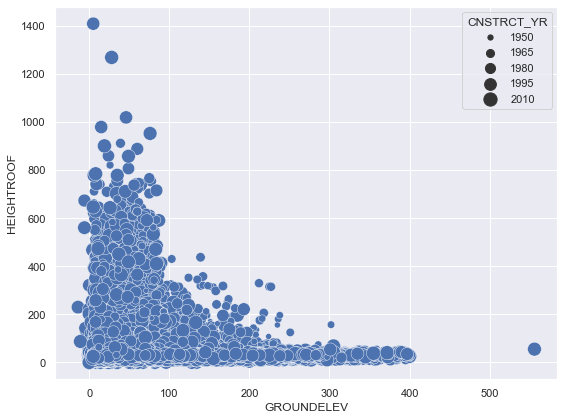

In [76]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                size="CNSTRCT_YR", 
                sizes=(15, 200))

plt.tight_layout()
plt.savefig('figures/3-2-2-k')

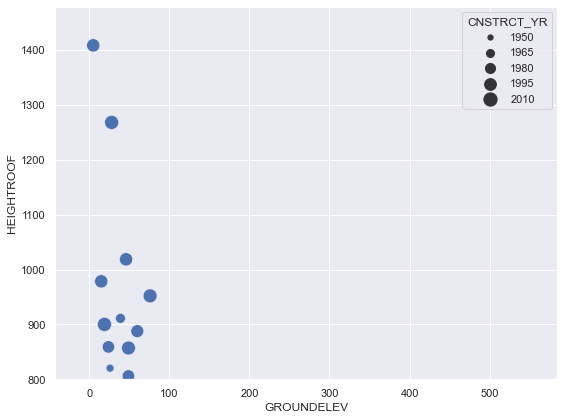

In [77]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                size="CNSTRCT_YR", 
                sizes=(15, 200))

plt.ylim(bottom=800)
plt.tight_layout()
plt.savefig('figures/3-2-2-l')

### Relational Plots onto a Facet Grid

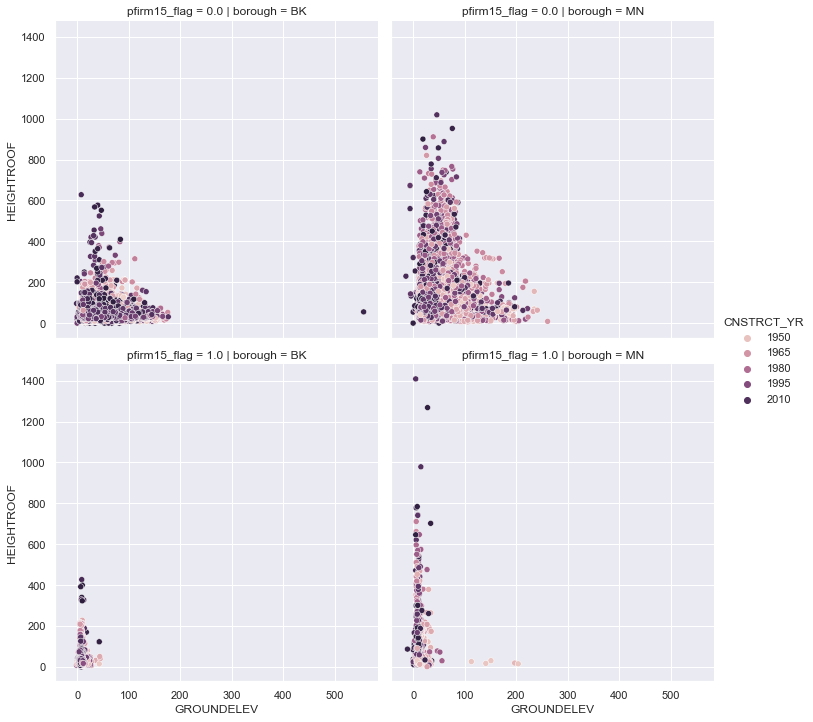

In [78]:
sns.relplot(data=building_footprints.loc[building_footprints['borough'].isin(["MN", "BK"])], 
            x="GROUNDELEV", 
            y="HEIGHTROOF", 
            hue="CNSTRCT_YR", 
            col="borough", 
            row="pfirm15_flag",
            facet_kws={"legend_out": True})

plt.savefig('figures/3-2-3-a', bbox_inches='tight')

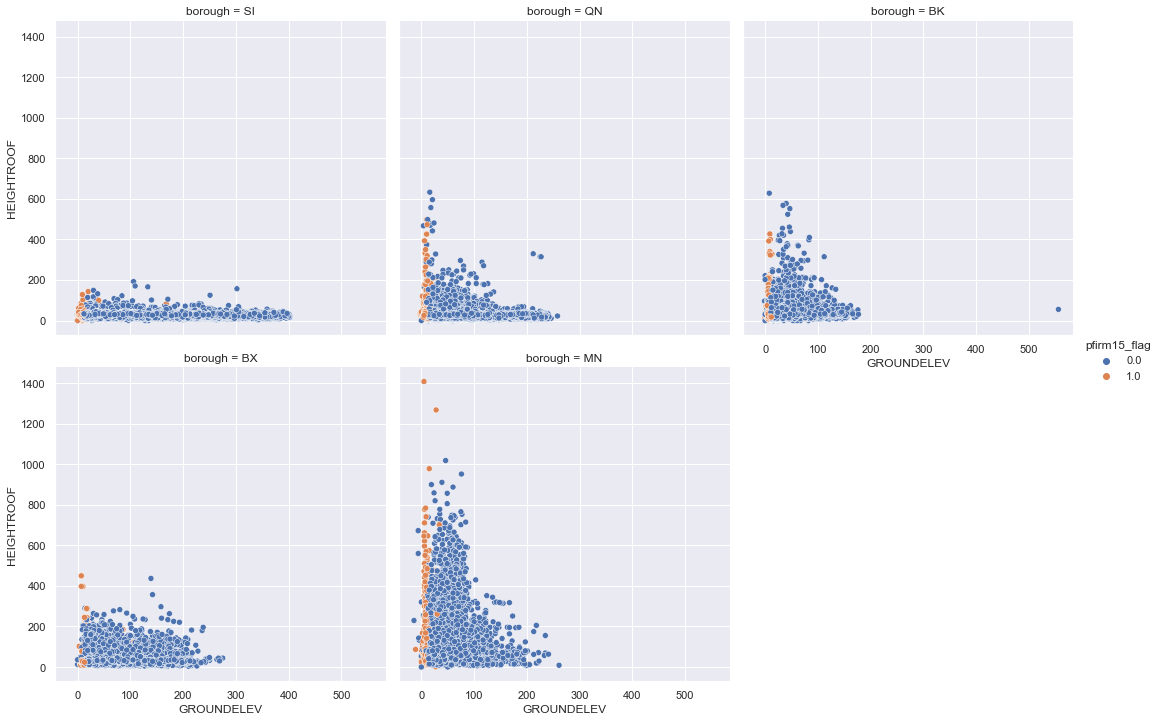

In [79]:
sns.relplot(data=building_footprints, 
            x="GROUNDELEV", 
            y="HEIGHTROOF", 
            hue="pfirm15_flag", 
            col="borough", 
            col_wrap=3,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-2-3-b', bbox_inches='tight')

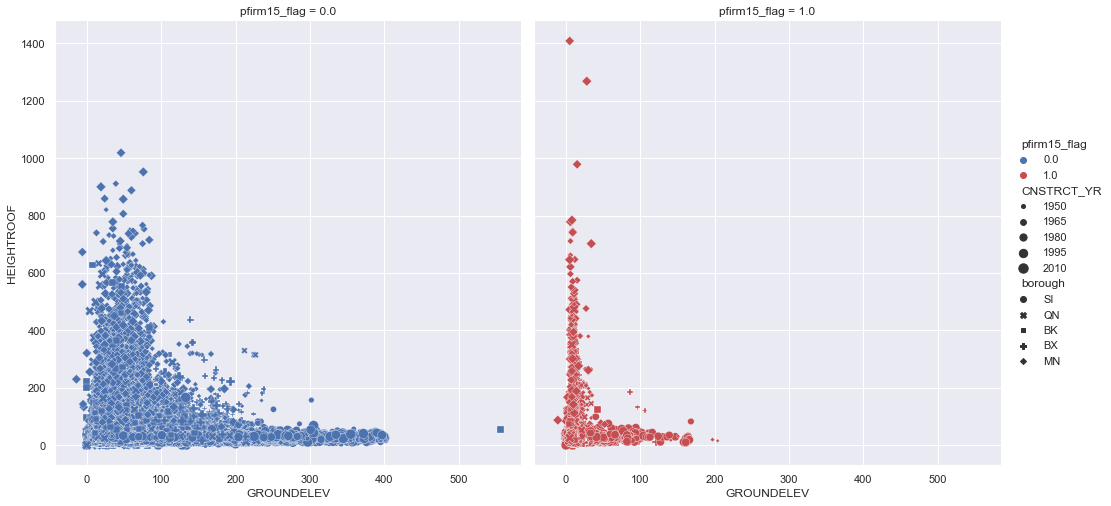

In [80]:
sns.relplot(data=building_footprints, 
            x="GROUNDELEV", 
            y="HEIGHTROOF", 
            col="pfirm15_flag",
            hue="pfirm15_flag", 
            size="CNSTRCT_YR", 
            style="borough",
            palette=["b", "r"], 
            sizes=(10, 100),
            height=7,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-2-3-c', bbox_inches='tight')

## Joint Grids

### Scatter Plots

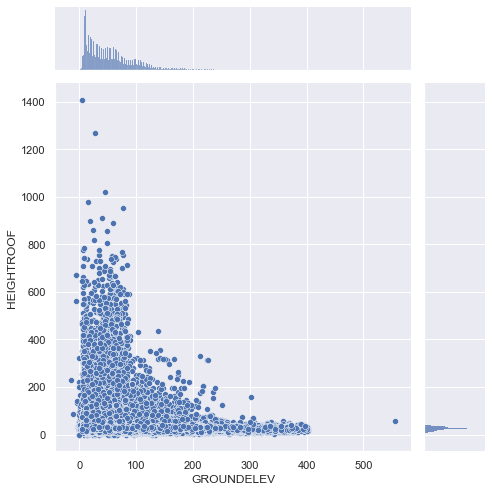

In [81]:
sns.jointplot(x='GROUNDELEV',
              y='HEIGHTROOF',
              data=building_footprints,
              height=7)

plt.tight_layout()
plt.savefig('figures/3-3-1-a')

### Hexbin Plots

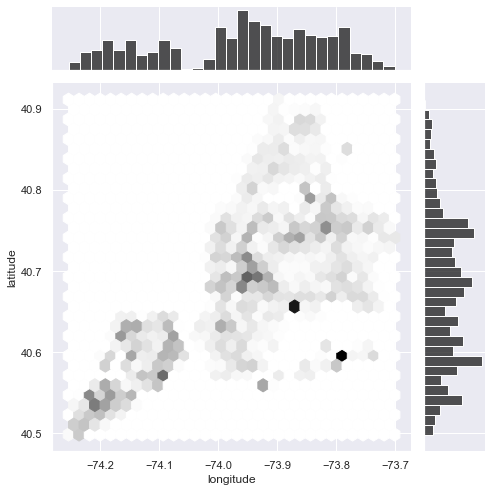

In [82]:
sample = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

sns.jointplot(x='longitude',
              y='latitude', 
              data=sample,
              kind="hex", 
              color="k", 
              height=7) 

plt.tight_layout()
plt.savefig('figures/3-3-2-a')

### Kernel Density Estimation

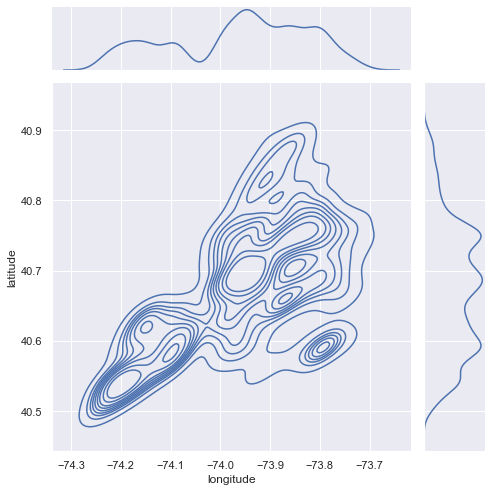

In [83]:
sample = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

sns.jointplot(x='longitude', 
              y='latitude', 
              data=sample, 
              kind="kde", 
              height=7)

plt.tight_layout()
plt.savefig('figures/3-3-3-a')

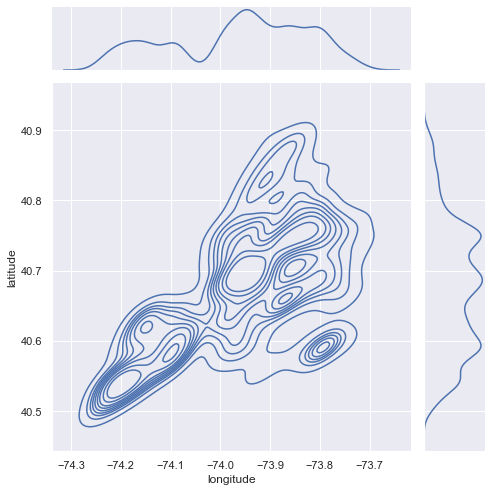

In [84]:
sample = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

sns.jointplot(x='longitude', 
              y='latitude', 
              data=sample, 
              kind="kde", 
              shade=False, 
              height=7)

plt.tight_layout()
plt.savefig('figures/3-3-3-b')

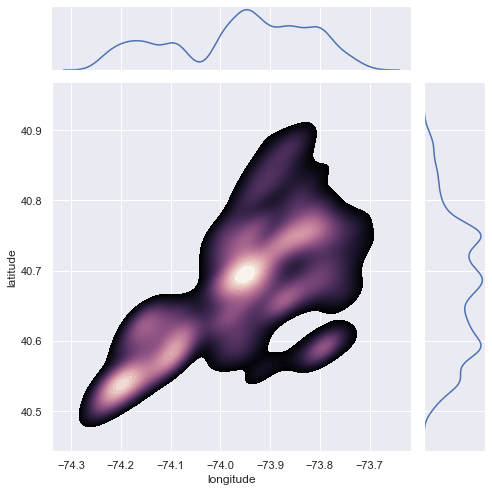

In [85]:
sample = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

cmap = sns.cubehelix_palette(as_cmap=True, 
                             dark=0, 
                             light=1, 
                             reverse=True)

sns.jointplot(x='longitude', 
              y='latitude', 
              data=sample, 
              kind="kde", 
              height=7, 
              cmap=cmap, 
              n_levels=60, 
              shade=True)

plt.tight_layout()
plt.savefig('figures/3-3-3-c')

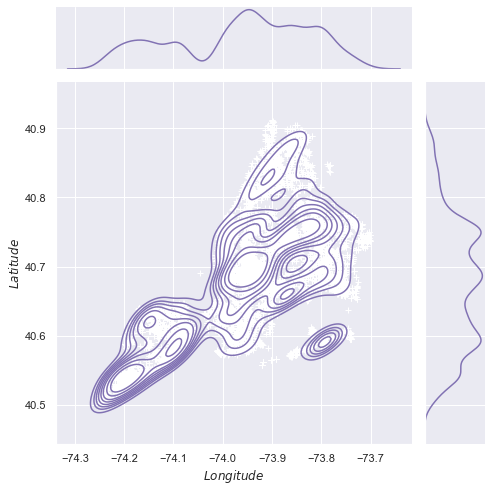

In [86]:
sample = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

g = sns.jointplot(x='longitude', 
                  y='latitude', 
                  data=sample, 
                  kind="kde", 
                  color="m", 
                  height=7)

g.plot_joint(plt.scatter, 
             c="w", 
             s=30, 
             linewidth=1,
             marker="+")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Longitude$", "$Latitude$")
plt.tight_layout()
plt.savefig('figures/3-3-3-d')

## Visualizing Pairwise Relationships in a Dataset

### Pair Plot

In [87]:
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382677 entries, 1 to 1080439
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   the_geom              382677 non-null  object 
 1   NAME                  989 non-null     object 
 2   BIN                   382677 non-null  int64  
 3   CNSTRCT_YR            382677 non-null  float64
 4   LSTMODDATE            382677 non-null  object 
 5   LSTSTATYPE            382601 non-null  object 
 6   DOITT_ID              382677 non-null  int64  
 7   HEIGHTROOF            380992 non-null  float64
 8   FEAT_CODE             382675 non-null  float64
 9   GROUNDELEV            382403 non-null  float64
 10  SHAPE_AREA            382677 non-null  int64  
 11  SHAPE_LEN             382677 non-null  int64  
 12  BASE_BBL              382677 non-null  float64
 13  MPLUTO_BBL            382677 non-null  float64
 14  GEOMSOURCE            382583 non-null  object 
 15 

# Analyzing only buildings built between 2010 and 2020
Mostly to speed up the visualizations

In [88]:
# returning only buildings built between 2010 and 2020
building_footprints = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

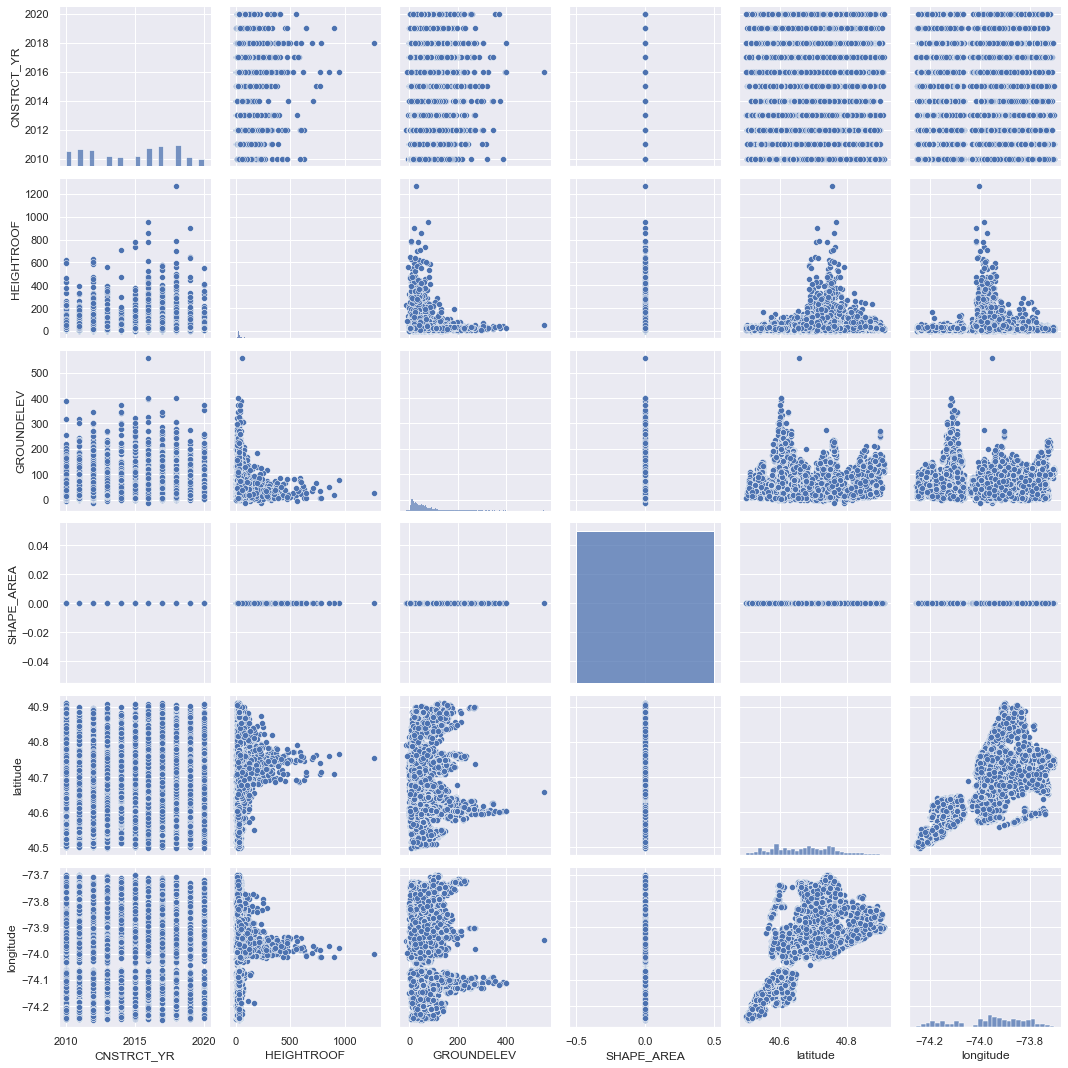

In [89]:
selected = building_footprints[['borough', 
                                'CNSTRCT_YR', 
                                'HEIGHTROOF', 
                                'GROUNDELEV', 
                                'SHAPE_AREA', 
                                'latitude', 
                                'longitude']]

sns.pairplot(selected)

plt.tight_layout()
plt.savefig('figures/3-4-a')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


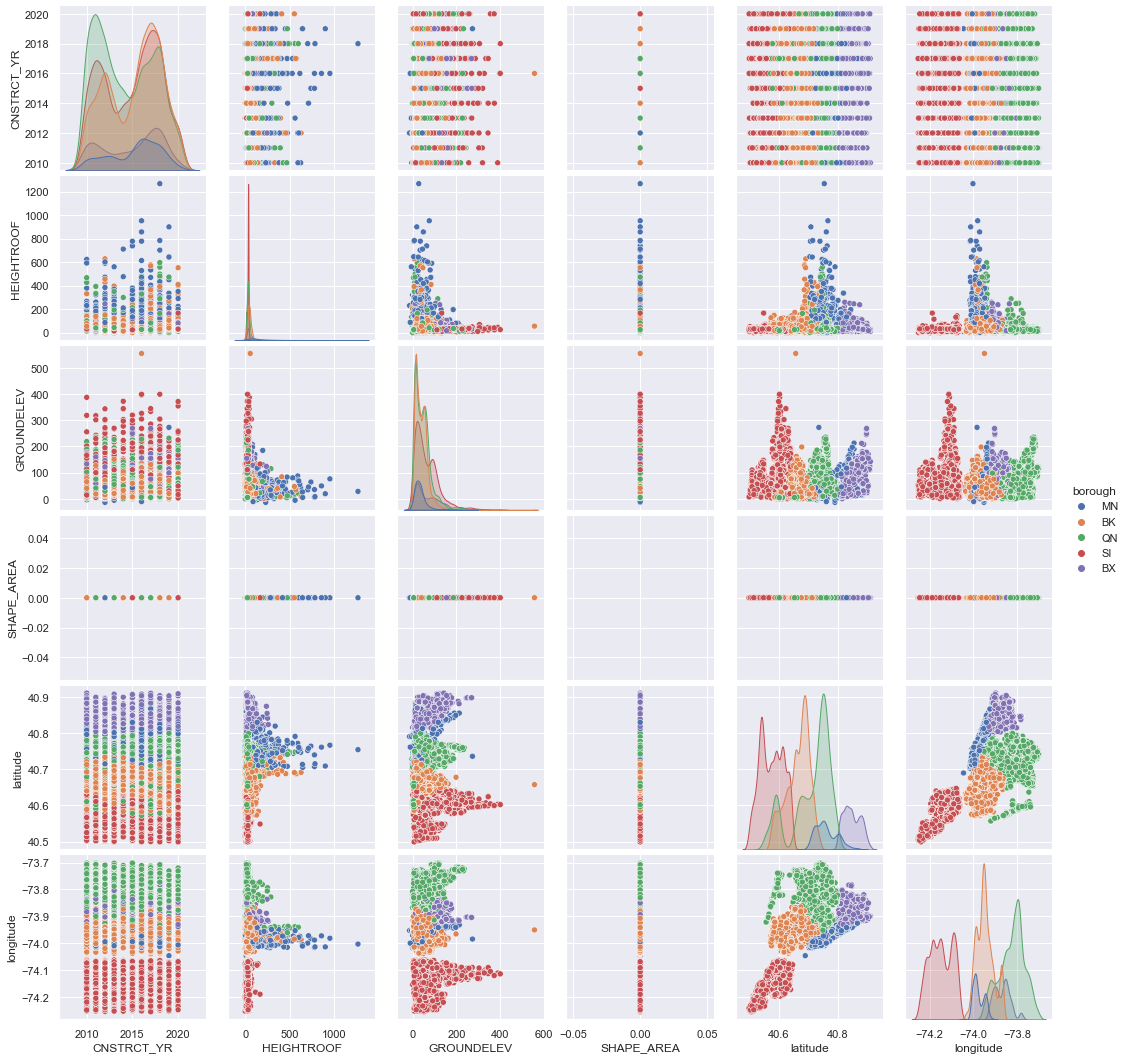

In [90]:
sns.pairplot(selected, 
             hue="borough")

plt.savefig('figures/3-4-b', bbox_inches='tight')

### Heat Maps

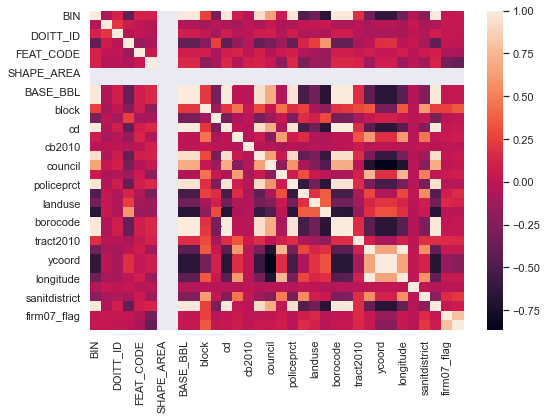

In [91]:
plt.figure(figsize=(8,6))

sns.heatmap(building_footprints.corr())

plt.tight_layout()
plt.savefig('figures/3-5-a')

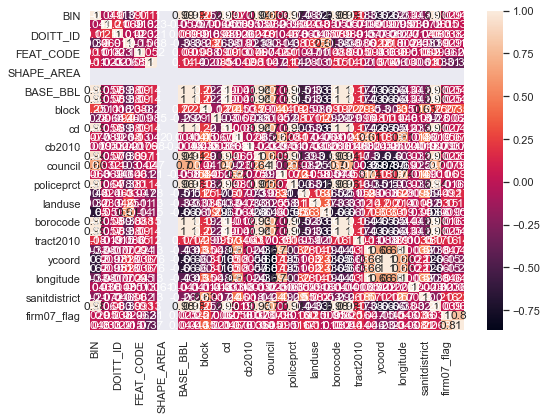

In [92]:
plt.figure(figsize=(8,6))

sns.heatmap(building_footprints.corr(), annot=True)

plt.tight_layout()
plt.savefig('figures/3-5-b')

## Categorical Plots

In [93]:
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13662 entries, 281 to 1080435
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   the_geom              13662 non-null  object 
 1   NAME                  41 non-null     object 
 2   BIN                   13662 non-null  int64  
 3   CNSTRCT_YR            13662 non-null  float64
 4   LSTMODDATE            13662 non-null  object 
 5   LSTSTATYPE            13591 non-null  object 
 6   DOITT_ID              13662 non-null  int64  
 7   HEIGHTROOF            12086 non-null  float64
 8   FEAT_CODE             13660 non-null  float64
 9   GROUNDELEV            13435 non-null  float64
 10  SHAPE_AREA            13662 non-null  int64  
 11  SHAPE_LEN             13662 non-null  int64  
 12  BASE_BBL              13662 non-null  float64
 13  MPLUTO_BBL            13662 non-null  float64
 14  GEOMSOURCE            13617 non-null  object 
 15  borough        

### Count Plot

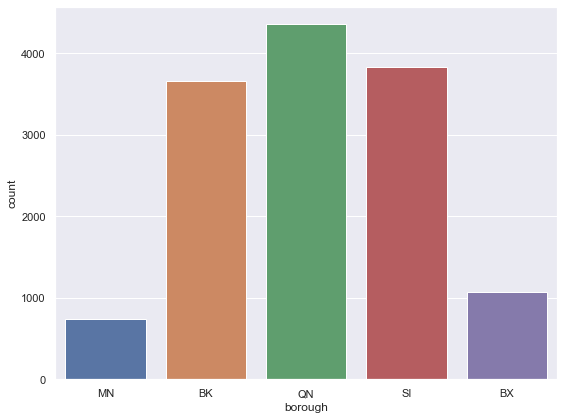

In [94]:
plt.figure(figsize=(8,6))

sns.countplot(x="borough", 
              data=building_footprints)

plt.tight_layout()
plt.savefig('figures/3-6-1-a')

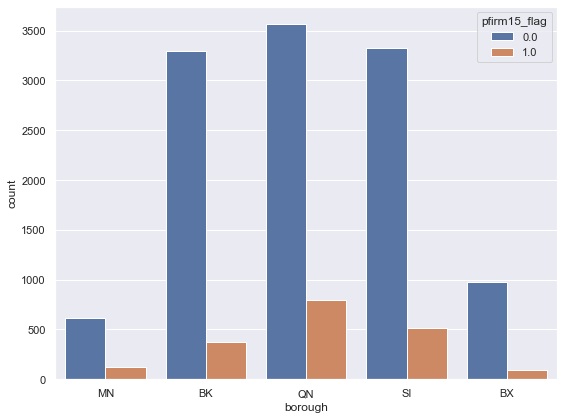

In [95]:
plt.figure(figsize=(8,6))

sns.countplot(x="borough", 
              data=building_footprints,
              hue='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-6-1-b')

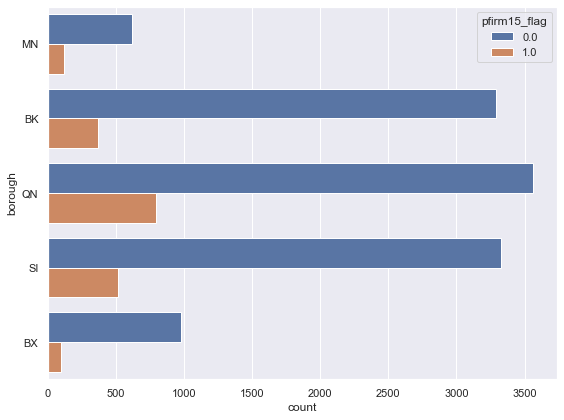

In [96]:
plt.figure(figsize=(8,6))

sns.countplot(y="borough", 
              data=building_footprints,
              hue='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-6-1-c')

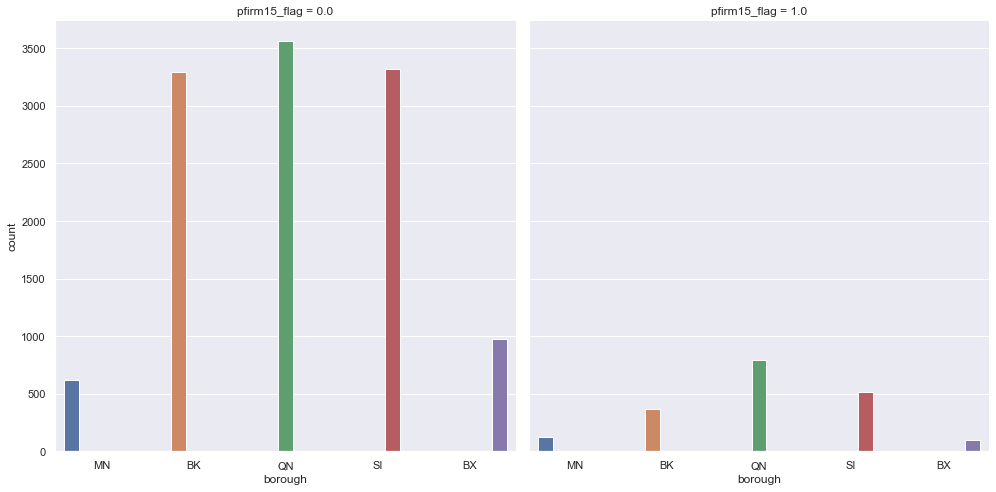

In [97]:
sns.catplot(x="borough", 
            data=building_footprints,
            col='pfirm15_flag',
            hue='borough',
            kind='count',
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-1-d')

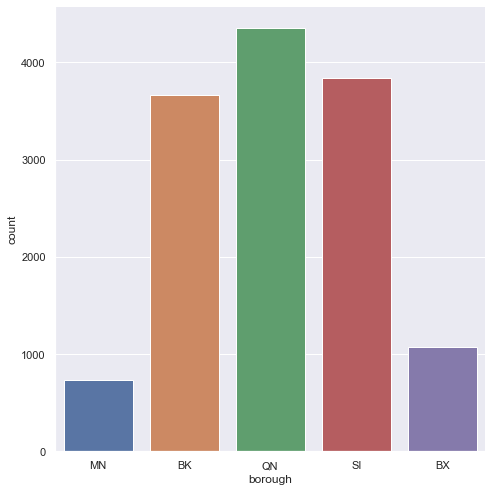

In [98]:
sns.catplot(x="borough", 
            kind="count", 
            data = building_footprints, 
            height = 7)

plt.tight_layout()
plt.savefig('figures/3-6-1-e')

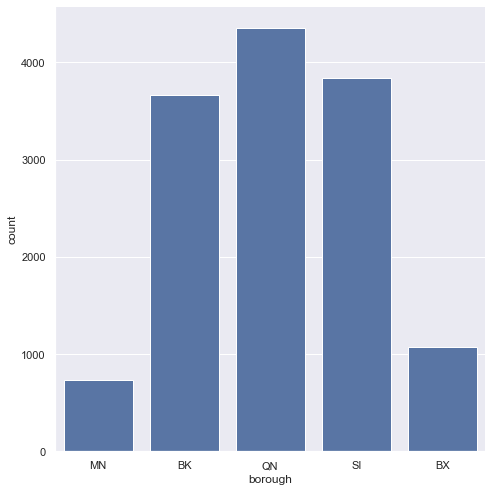

In [99]:
sns.catplot(x="borough", 
            kind="count", 
            data = building_footprints, 
            color="C0", 
            height = 7)

plt.tight_layout()
plt.savefig('figures/3-6-1-f')

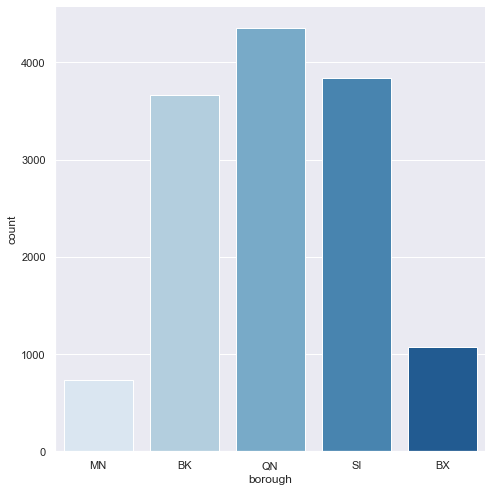

In [100]:
sns.catplot(x="borough", 
            kind="count", 
            palette="Blues", 
            data = building_footprints, 
            height = 7)

plt.tight_layout()
plt.savefig('figures/3-6-1-g')

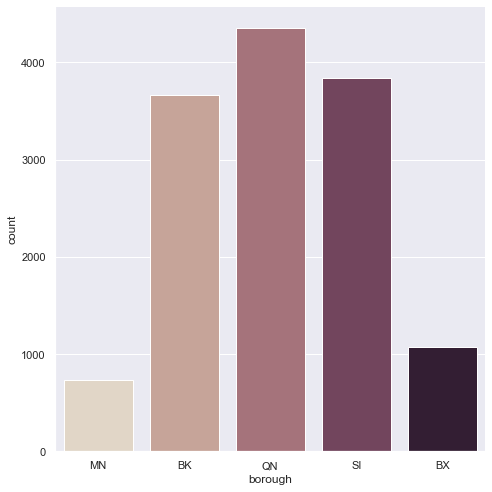

In [101]:
sns.catplot(x="borough", 
            kind="count", 
            palette="ch:.25", 
            data = building_footprints,  
            height = 7)

plt.tight_layout()
plt.savefig('figures/3-6-1-h')

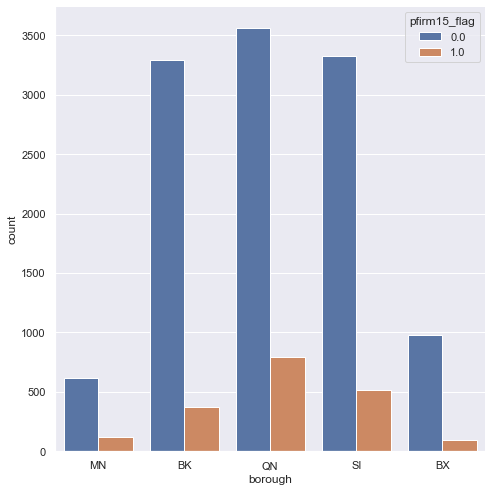

In [102]:
sns.catplot(x="borough",  
            hue="pfirm15_flag", 
            kind="count", 
            data=building_footprints, 
            height = 7, 
            ci=None, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-1-i')

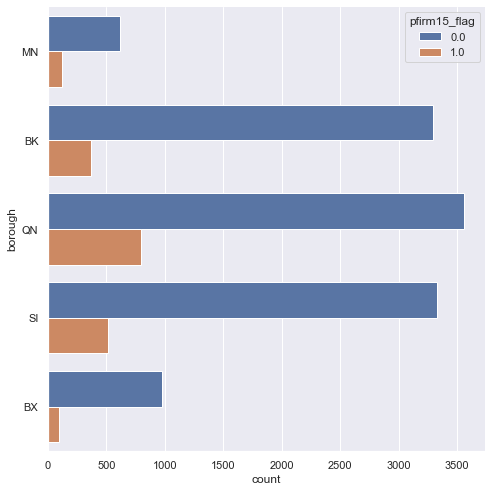

In [103]:
sns.catplot(y="borough",  
            hue="pfirm15_flag", 
            kind="count", 
            data=building_footprints, 
            height = 7, 
            estimator=np.median, 
            ci=None, 
            legend=False)

plt.legend(loc='best', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-1-j')

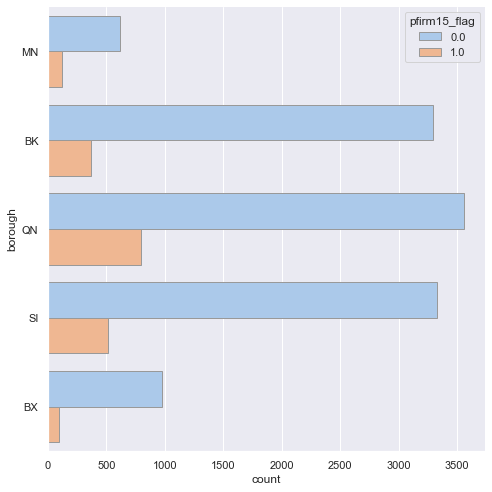

In [104]:
sns.catplot(y="borough", 
            hue="pfirm15_flag", 
            kind="count",
            palette="pastel", 
            edgecolor=".6",
            data=building_footprints, 
            height = 7, 
            legend=False)

plt.legend(loc='best', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-1-k')

### Bar Plot

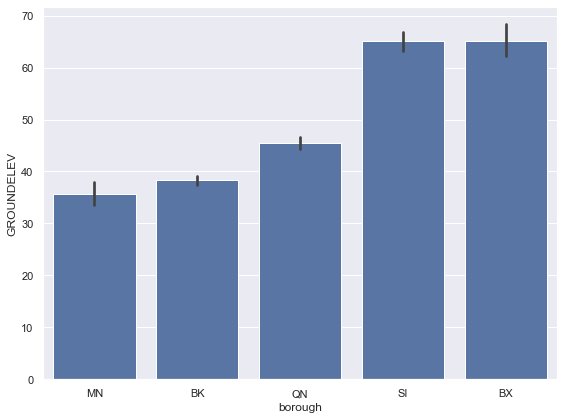

In [105]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV', 
            color="C0")

plt.tight_layout()
plt.savefig('figures/3-6-2-a')

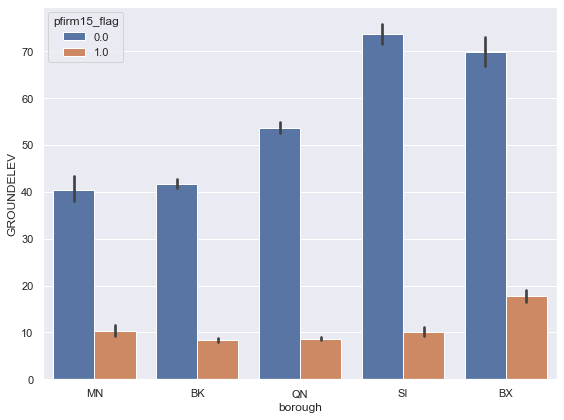

In [106]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV',
            hue='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-6-2-b')

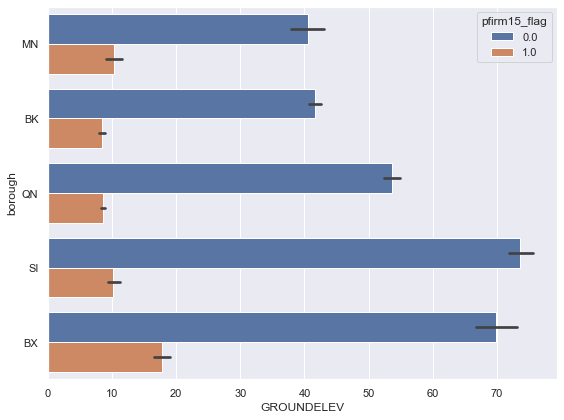

In [107]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='GROUNDELEV',  
            y= 'borough',
            hue='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-6-2-c')

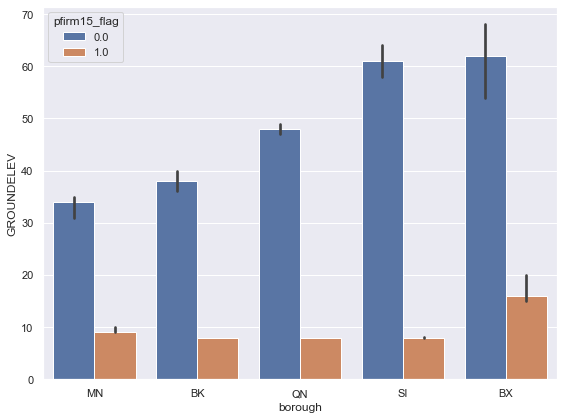

In [108]:
from numpy import median

plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV',
            hue='pfirm15_flag',
            estimator=median)

plt.tight_layout()
plt.savefig('figures/3-6-2-d')

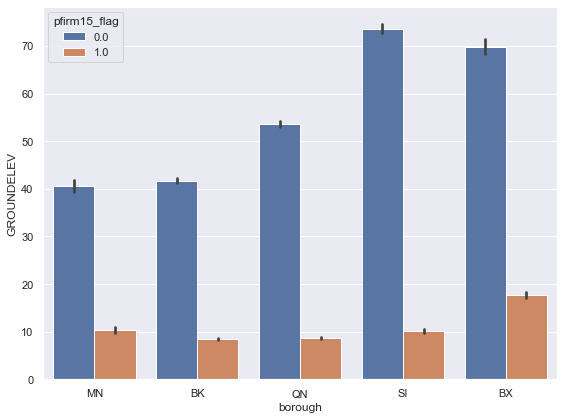

In [109]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV',
            hue='pfirm15_flag',
            ci=68)

plt.tight_layout()
plt.savefig('figures/3-6-2-e')

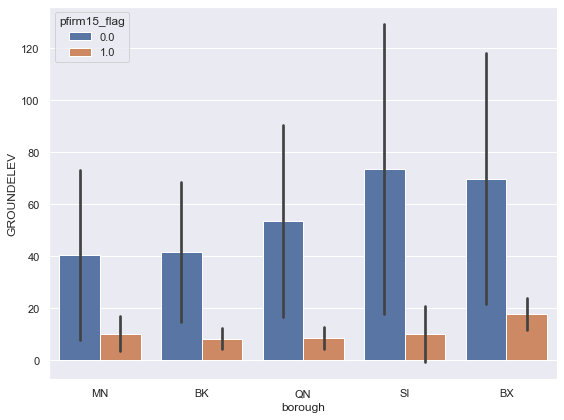

In [110]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV',
            hue='pfirm15_flag',
            ci='sd')

plt.tight_layout()
plt.savefig('figures/3-6-2-f')

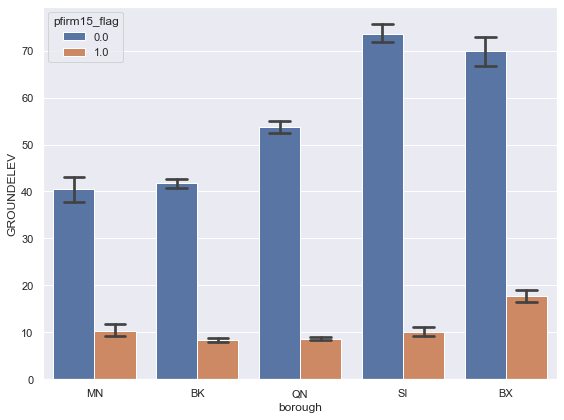

In [111]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV',
            hue='pfirm15_flag',
            capsize=.2)

plt.tight_layout()
plt.savefig('figures/3-6-2-g')

### Scatter Plot

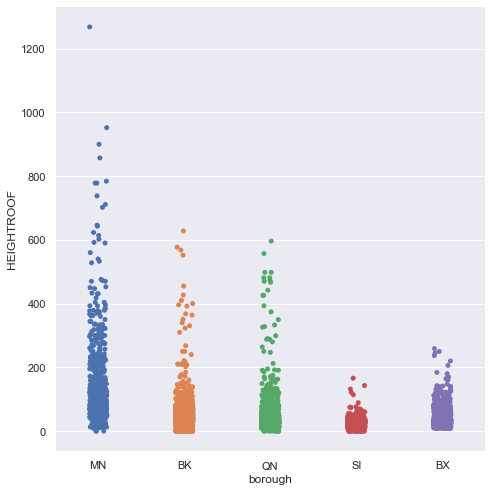

In [112]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            data=building_footprints, 
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-3-a')

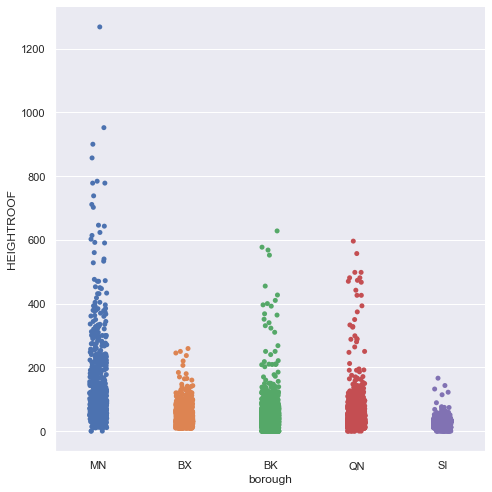

In [113]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            order=["MN", "BX", "BK", "QN", "SI"], 
            data=building_footprints, 
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-3-b')

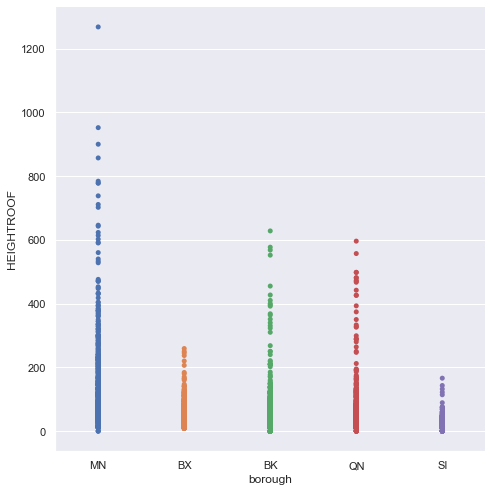

In [114]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            data=building_footprints, 
            order=["MN", "BX", "BK", "QN", "SI"], 
            height=7, 
            jitter=False)

plt.tight_layout()
plt.savefig('figures/3-6-3-c')

### Scatter Plot - Swarm

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


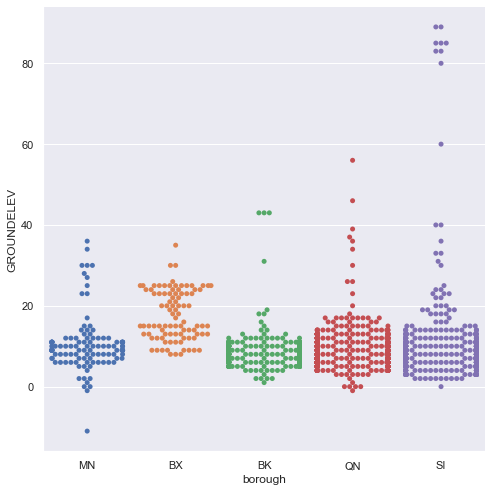

In [115]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order= ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='borough', 
            y='GROUNDELEV', 
            kind='swarm', 
            order=order, 
            data=data, 
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-4-a')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 82.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


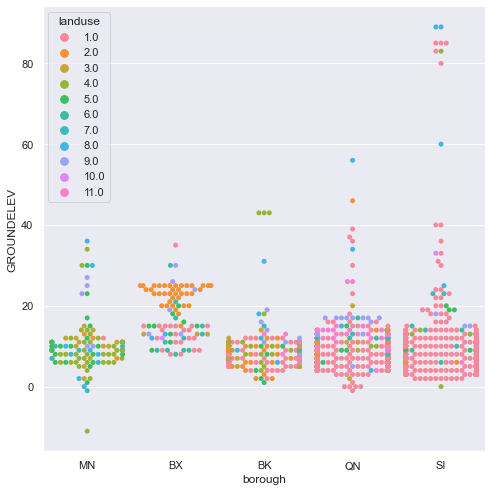

In [116]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='borough', 
            y='GROUNDELEV', 
            hue='landuse', 
            kind='swarm', 
            data=data, 
            order=order, 
            height=7,
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-4-b')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 82.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


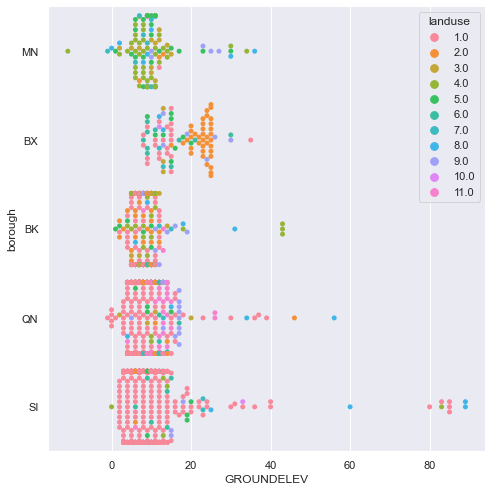

In [117]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='GROUNDELEV', 
            y='borough', 
            hue='landuse', 
            kind='swarm', 
            data=data, 
            order=order, 
            height=7,
            legend=False)

plt.legend(loc='upper right', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-4-c')

### Box Plot

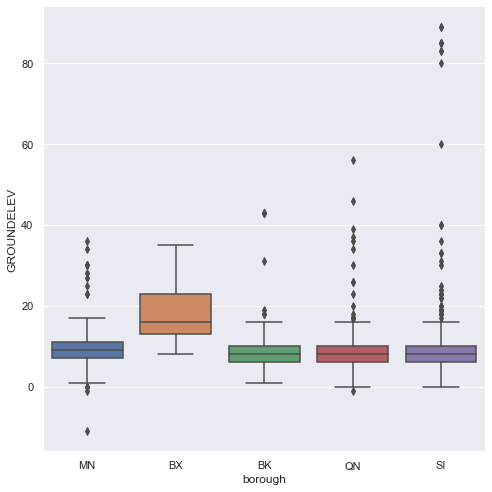

In [118]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="box", 
            data=data, 
            order=order, 
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-5-a')

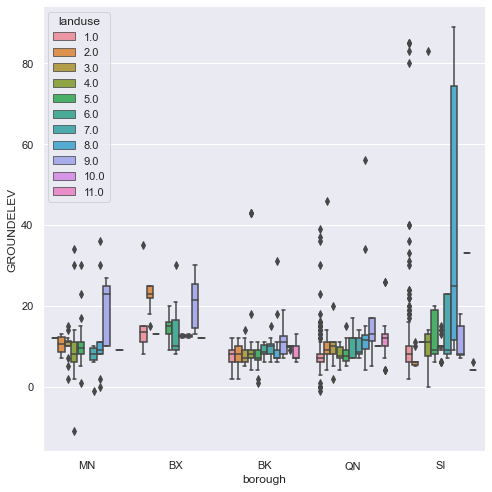

In [119]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="box", 
            hue='landuse', 
            data=data, 
            order=order, 
            height=7,
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-5-b')

### Boxen Plot

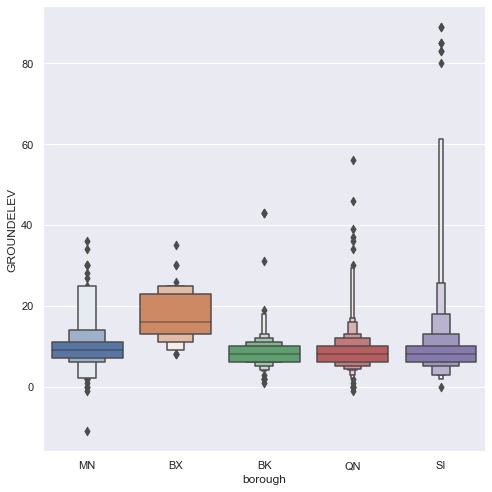

In [120]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="boxen", 
            data=data, 
            order=order, 
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-6-a')

### Violin Plot

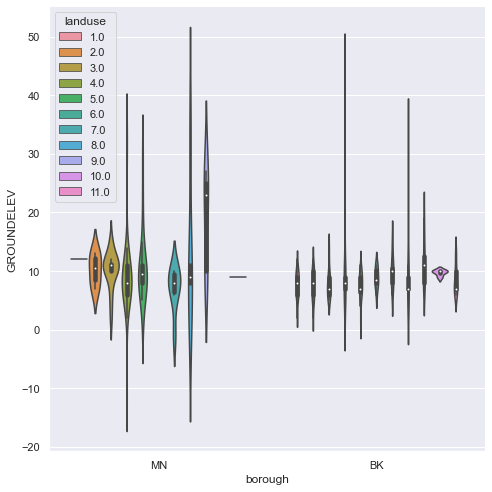

In [121]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-7-a')

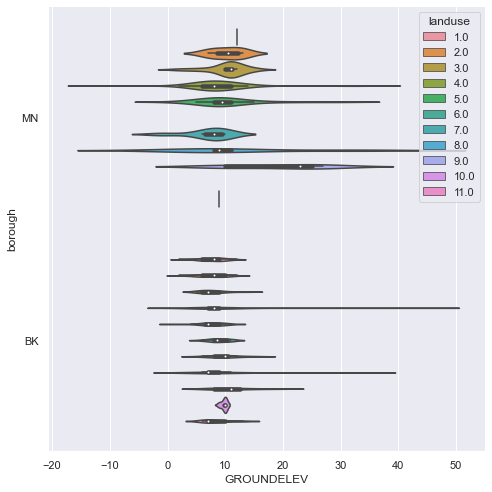

In [122]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                               (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="GROUNDELEV", 
            y="borough", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper right', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-7-b')

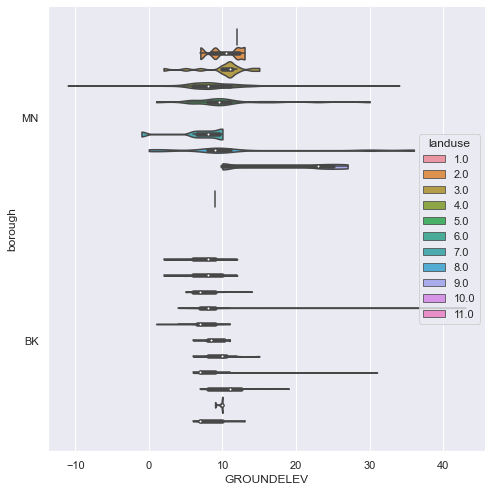

In [123]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="GROUNDELEV", 
            y="borough", 
            kind="violin", 
            hue='landuse', 
            data = data, 
            bw=.15, 
            cut=0, 
            height=7, 
            legend=False)

plt.legend(loc='center right', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-7-c')

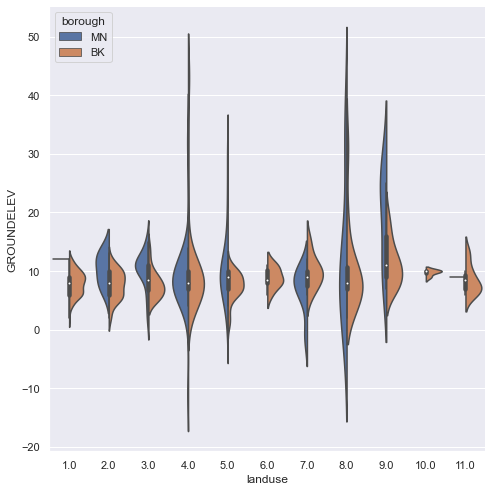

In [124]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="landuse", 
            y="GROUNDELEV", 
            hue="borough", 
            kind="violin", 
            split=True, 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='borough')
plt.tight_layout()
plt.savefig('figures/3-6-7-d')

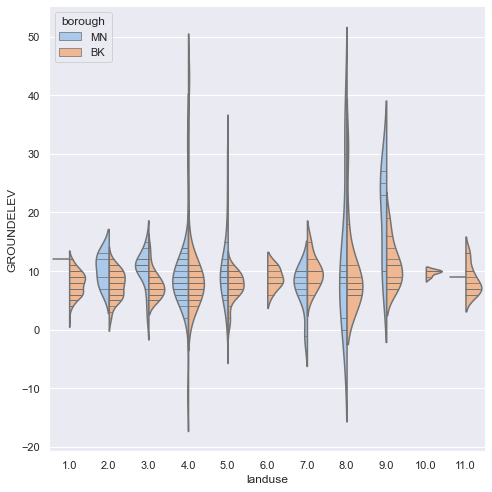

In [125]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="landuse", 
            y="GROUNDELEV", 
            hue="borough", 
            kind="violin", 
            inner="stick", 
            split=True,
            palette="pastel", 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='borough')
plt.tight_layout()
plt.savefig('figures/3-6-7-e')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


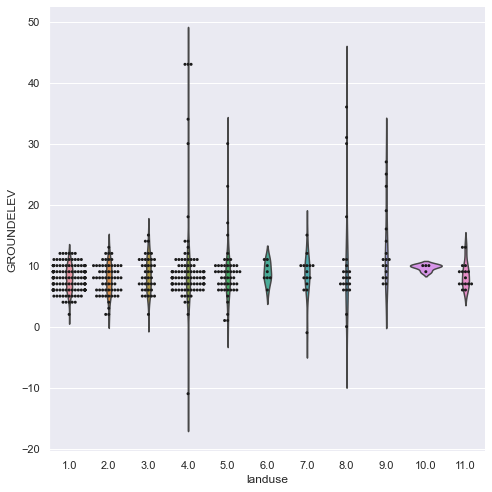

In [126]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

g = sns.catplot(x="landuse", 
                y="GROUNDELEV", 
                kind="violin", 
                inner=None, 
                data=data, 
                height=7)

sns.swarmplot(x="landuse", 
              y="GROUNDELEV", 
              color="k", 
              size=3, 
              data=data, 
              ax=g.ax)

plt.tight_layout()
plt.savefig('figures/3-6-7-f')

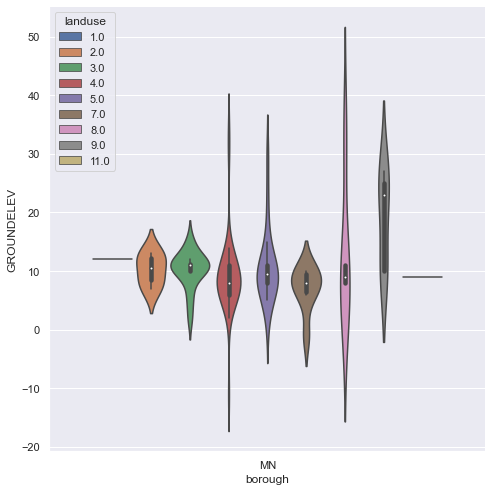

In [127]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-7-g')

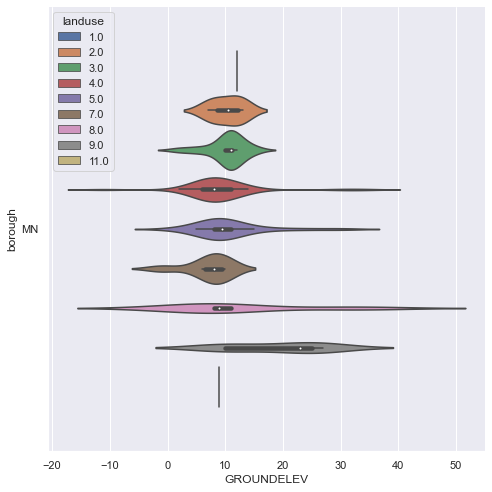

In [128]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                               (building_footprints['borough'].isin(["MN"]))]

sns.catplot(x="GROUNDELEV", 
            y="borough", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-7-h')

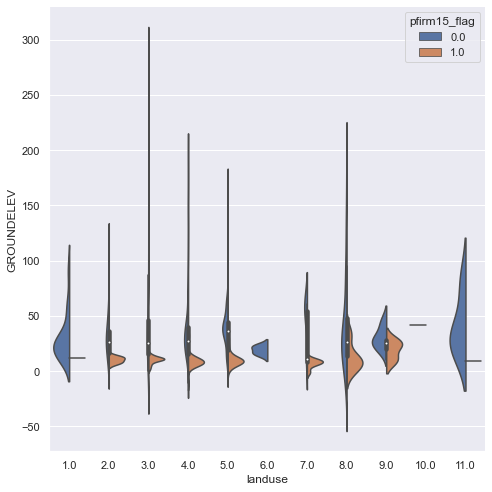

In [129]:
data = building_footprints.loc[building_footprints['borough'].isin(["MN"])]

sns.catplot(x="landuse", 
            y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="violin", 
            split=True, 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-7-i')

### Point Plot

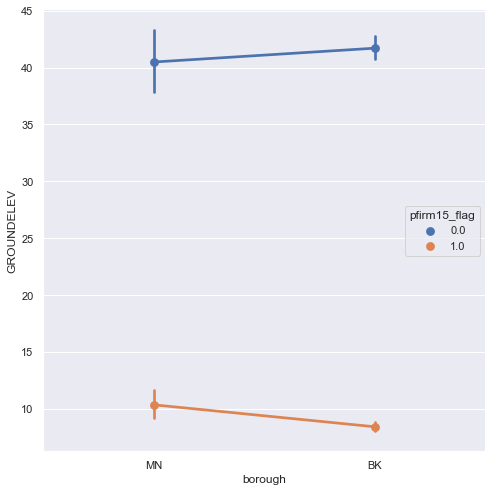

In [130]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y='GROUNDELEV',
            hue="pfirm15_flag", 
            kind="point", 
            data=data,
            height=7, 
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-8-a')

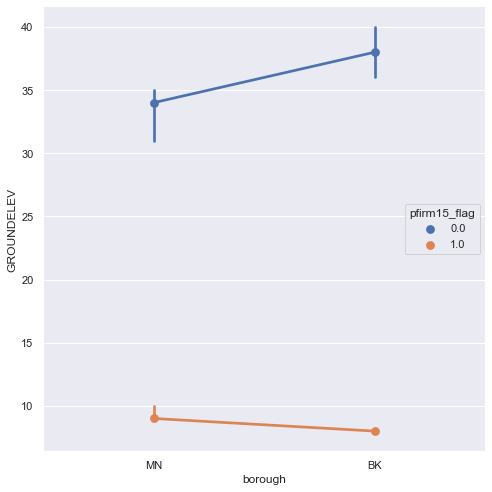

In [131]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y='GROUNDELEV',
            hue="pfirm15_flag", 
            kind="point", 
            data=data,
            height = 7, 
            estimator=np.median,
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-8-b')

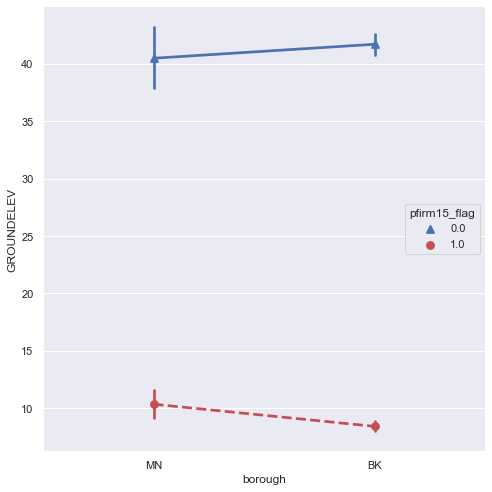

In [132]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y='GROUNDELEV',
            hue="pfirm15_flag",
            palette={0.0: "b", 1.0: "r"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", 
            data=data, 
            height = 7,
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-8-c')

### Showing Multiple Relationships with Facets

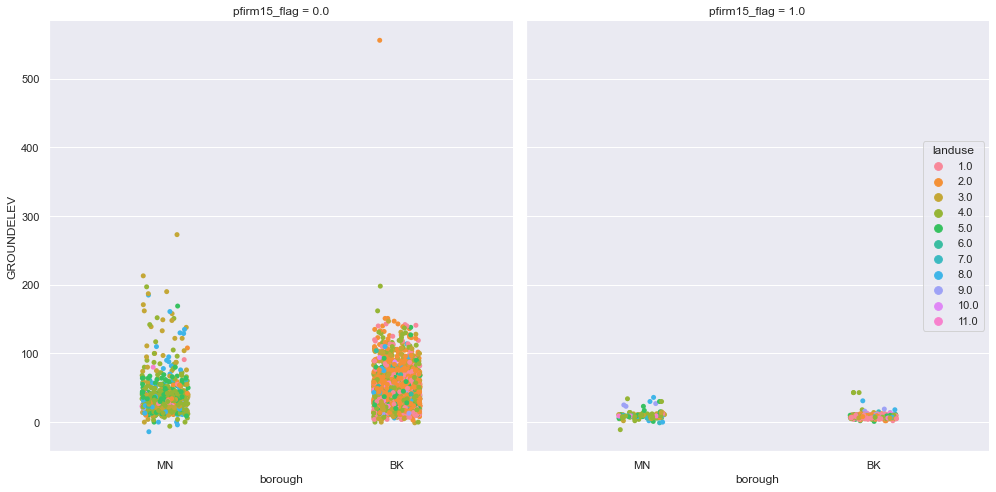

In [133]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV",
            hue="landuse",
            col="pfirm15_flag", 
            height = 7, 
            data=data,
            legend=False)

plt.legend(loc='center right', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-9-a')

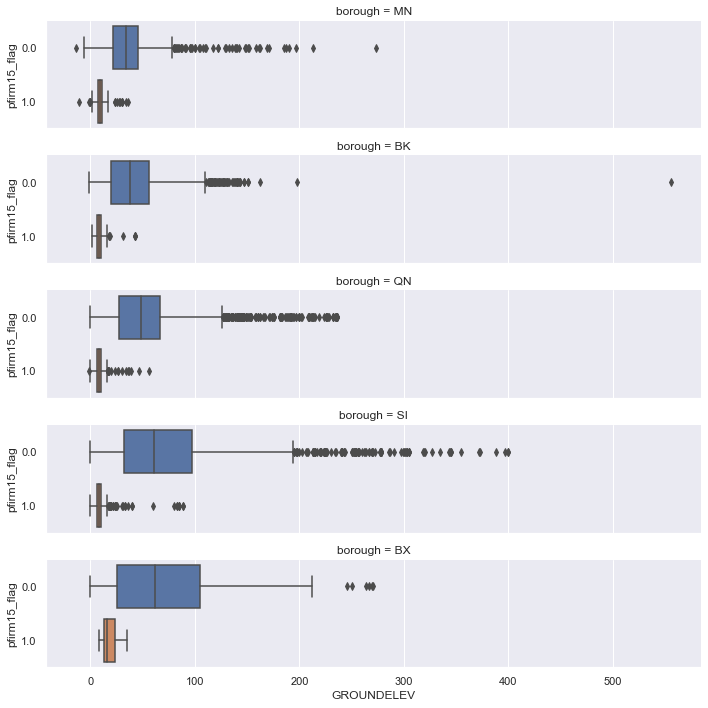

In [134]:
data = building_footprints

sns.catplot(x="GROUNDELEV", 
            y="pfirm15_flag", 
            row="borough",
            kind="box", 
            orient="h", 
            height = 2, 
            aspect = 5, 
            data=data)

plt.tight_layout()
plt.savefig('figures/3-6-9-b')

# 4. Plotting with Pandas 

## Line Plot

In [135]:
by_year = building_footprints.groupby('CNSTRCT_YR')[['DOITT_ID']].count()
by_year.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
by_year = by_year.reset_index()
by_year['CNSTRCT_YR'] = by_year['CNSTRCT_YR'].astype(int)

by_year.head()

CNSTRCT_YR  count
0        2010   1364
1        2011   1487
2        2012   1440
3        2013    899
4        2014    818

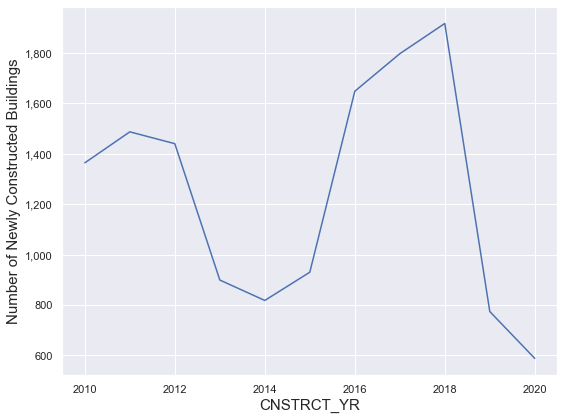

In [136]:
fig, ax = plt.subplots(figsize=(8,6))

by_year.plot(x='CNSTRCT_YR', 
             y='count', 
             legend=False, 
             ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('CNSTRCT_YR', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-1-a')

## Timeseries Plot

In [137]:
g = building_footprints.groupby('CNSTRCT_YR')['DOITT_ID'].count().reset_index()
g.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)

g.set_index('CNSTRCT_YR', drop=False, inplace=True)
g.index = g.index.astype('int64')

# transforming our 'Year' index to datetime
g.index = pd.to_datetime(g.index, format='%Y')

g.index.dtype

dtype('<M8[ns]')

In [138]:
g.head()

CNSTRCT_YR  count
CNSTRCT_YR                   
2010-01-01      2010.0   1364
2011-01-01      2011.0   1487
2012-01-01      2012.0   1440
2013-01-01      2013.0    899
2014-01-01      2014.0    818

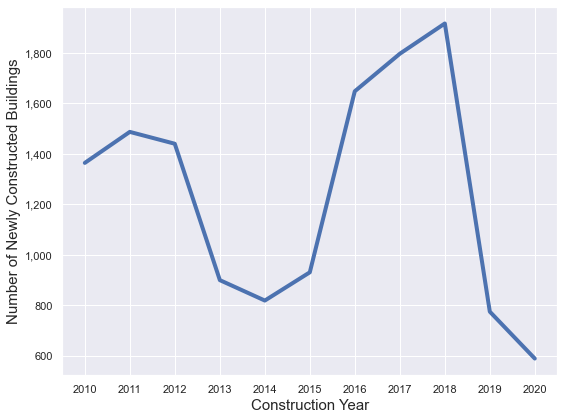

In [139]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(g['count'], 
        linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-1-b')

In [140]:
table = pd.pivot_table(building_footprints, 
                       values='DOITT_ID', 
                       index=['CNSTRCT_YR'], 
                       columns = ['borough'], 
                       aggfunc=pd.Series.nunique)

table.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
table.index = table.index.astype('int64')
table.index = pd.to_datetime(table.index, format='%Y')

table.index.dtype

dtype('<M8[ns]')

In [141]:
table.head()

borough      BK   BX  MN   QN   SI
CNSTRCT_YR                        
2010-01-01  256  141  57  567  343
2011-01-01  266  100  42  628  451
2012-01-01  423   74  57  505  381
2013-01-01  258   50  60  348  183
2014-01-01  145   78  21  313  261

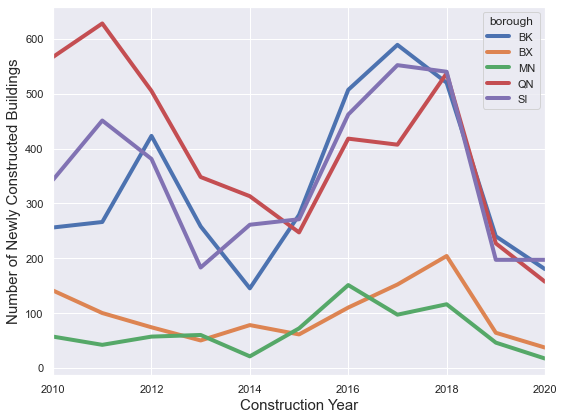

In [142]:
fig, ax = plt.subplots(figsize=(8,6))

table.plot(ax=ax, 
           linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-1-c')

In [143]:
table_cumsum = table.cumsum()
table_cumsum.head()

borough       BK   BX   MN    QN    SI
CNSTRCT_YR                            
2010-01-01   256  141   57   567   343
2011-01-01   522  241   99  1195   794
2012-01-01   945  315  156  1700  1175
2013-01-01  1203  365  216  2048  1358
2014-01-01  1348  443  237  2361  1619

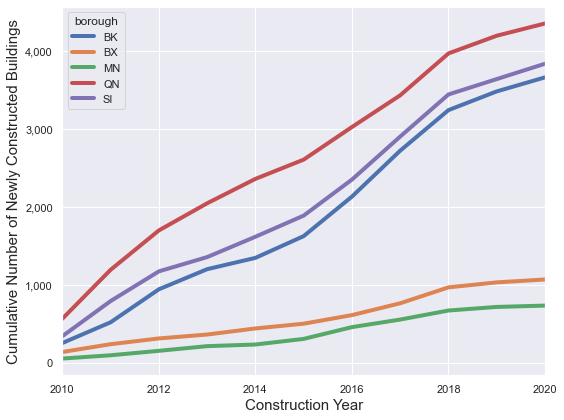

In [144]:
fig, ax = plt.subplots(figsize=(8,6))

table_cumsum.plot(ax=ax, 
                  linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Cumulative Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-1-d')

## Bar Plot

In [145]:
bar = building_footprints.groupby('borough')['DOITT_ID'].count()
bar.rename("count", inplace=True)
bar.sort_values(ascending=False, inplace=True)
bar

borough
QN    4354
SI    3838
BK    3663
BX    1071
MN     736
Name: count, dtype: int64

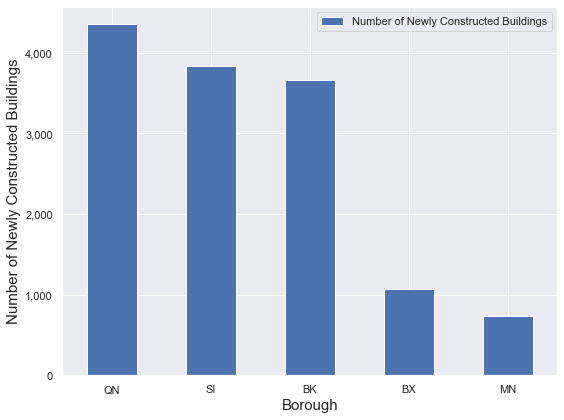

In [146]:
fig, ax = plt.subplots(figsize=(8,6))

bar.plot(kind='bar', 
         ax=ax, 
         label='Number of Newly Constructed Buildings')

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Borough', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-2-a')

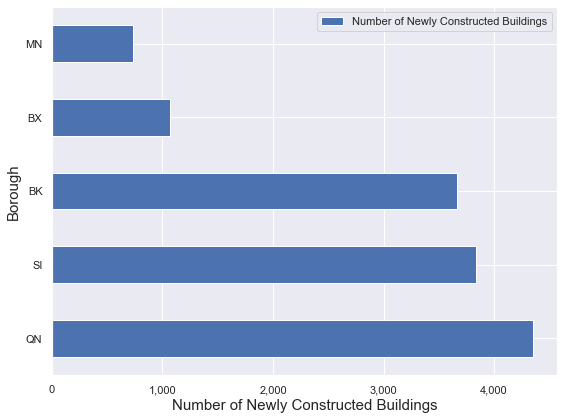

In [147]:
fig, ax = plt.subplots(figsize=(8,6))

bar.plot.barh(ax=ax, 
              label='Number of Newly Constructed Buildings')


# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Number of Newly Constructed Buildings', fontsize=15)
plt.ylabel('Borough', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-2-b')

In [148]:
table = building_footprints[building_footprints['CNSTRCT_YR'].between(2000, 2020)]


table = pd.pivot_table(table, 
                       values='DOITT_ID', 
                       index=['CNSTRCT_YR'], 
                       columns = ['borough'], 
                       aggfunc=pd.Series.nunique)

table.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
table.index = table.index.astype('int64')

table.index.dtype

dtype('int64')

In [149]:
table.head()

borough      BK   BX  MN   QN   SI
CNSTRCT_YR                        
2010        256  141  57  567  343
2011        266  100  42  628  451
2012        423   74  57  505  381
2013        258   50  60  348  183
2014        145   78  21  313  261

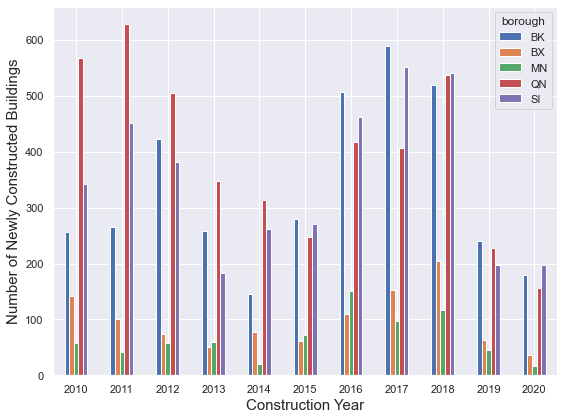

In [150]:
fig, ax = plt.subplots(figsize=(8,6))

table.plot(kind='bar', 
           ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-2-c')

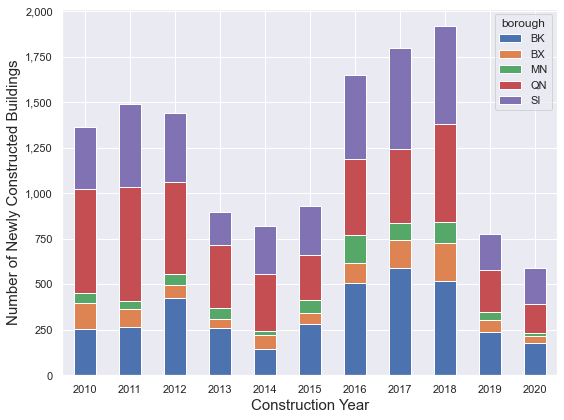

In [151]:
fig, ax = plt.subplots(figsize=(8,6))

table.plot.bar(stacked=True, 
               ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-2-d')

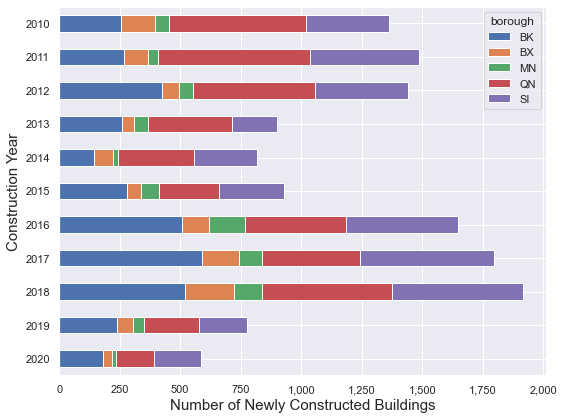

In [152]:
fig, ax = plt.subplots(figsize=(8,6))

table.sort_index(ascending=False).plot.barh(stacked=True, 
                                            ax=ax)

# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Number of Newly Constructed Buildings', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-2-e')

## Histograms

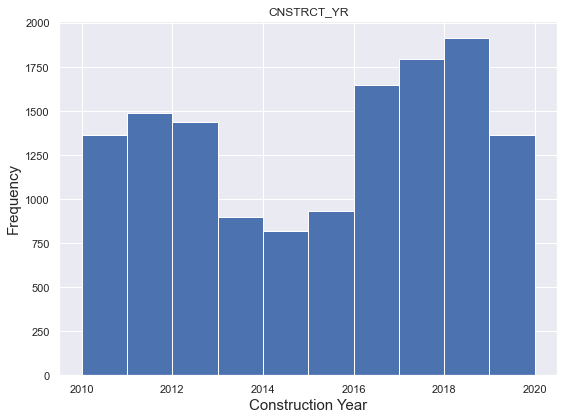

In [153]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.hist(ax=ax, 
                         column='CNSTRCT_YR')

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-3-a')

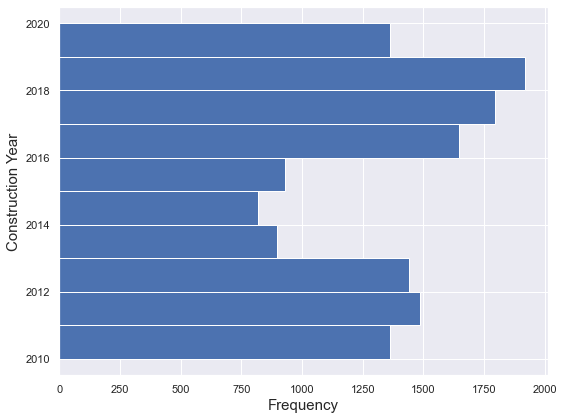

In [154]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['CNSTRCT_YR'].plot.hist(orientation='horizontal', 
                                            cumulative=False)

plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-3-b')

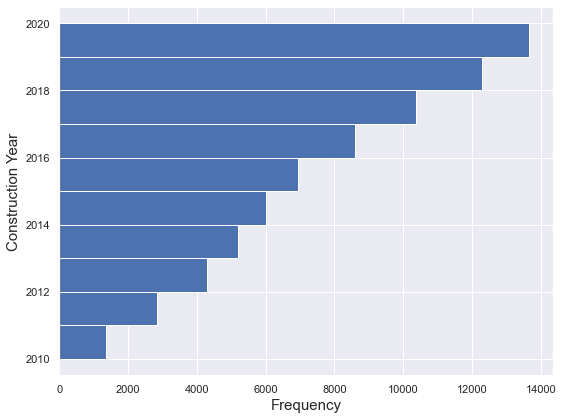

In [155]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['CNSTRCT_YR'].plot.hist(orientation='horizontal', 
                                            cumulative=True)

plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-3-c')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:412: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


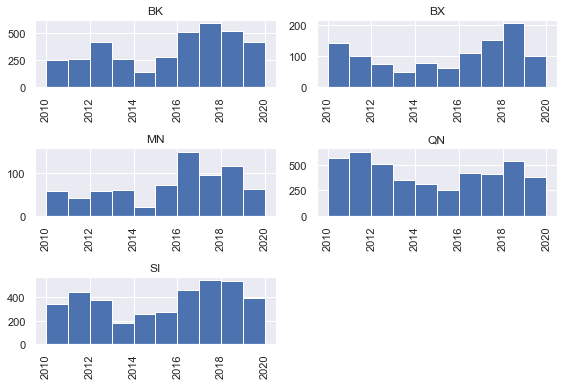

In [156]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.hist(ax=ax, 
                         column='CNSTRCT_YR', 
                         by='borough')

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figures/4-3-d')

In [157]:
mn = building_footprints.loc[(building_footprints['borough'].isin(["MN"]))]
bk = building_footprints.loc[(building_footprints['borough'].isin(["BK"]))]
bx = building_footprints.loc[(building_footprints['borough'].isin(["BX"]))]
qn = building_footprints.loc[(building_footprints['borough'].isin(["QN"]))]
si = building_footprints.loc[(building_footprints['borough'].isin(["SI"]))]

mn = mn['CNSTRCT_YR']
mn.rename('MN', inplace=True)

bk = bk['CNSTRCT_YR']
bk.rename('BK', inplace=True)

bx = bx['CNSTRCT_YR']
bx.rename('BX', inplace=True)

qn = qn['CNSTRCT_YR']
qn.rename('QN', inplace=True)

si = si['CNSTRCT_YR']
si.rename('SI', inplace=True)

8128       2016.0
14326      2015.0
16581      2017.0
16582      2017.0
21679      2018.0
            ...  
1079372    2020.0
1079373    2020.0
1079412    2010.0
1080184    2015.0
1080187    2015.0
Name: SI, Length: 3838, dtype: float64

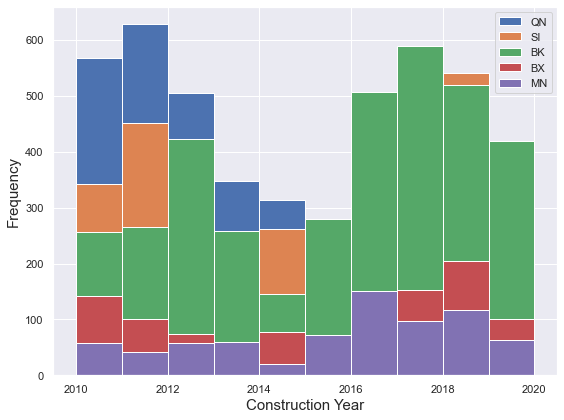

In [158]:
fig, ax = plt.subplots(figsize=(8,6))

qn.plot.hist(ax=ax)
si.plot.hist(ax=ax)
bk.plot.hist(ax=ax)
bx.plot.hist(ax=ax)
mn.plot.hist(ax=ax)

plt.legend()
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-3-e')

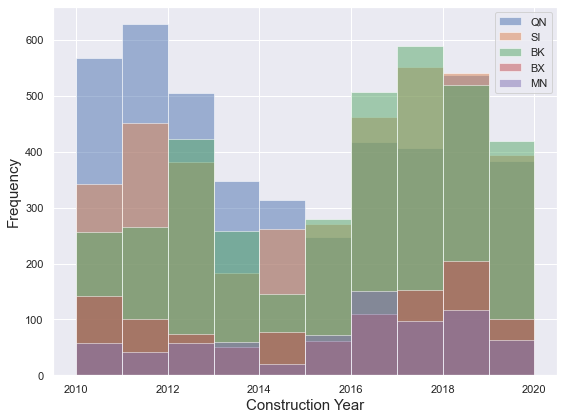

In [159]:
fig, ax = plt.subplots(figsize=(8,6))

qn.plot.hist(ax=ax, alpha=0.5)
si.plot.hist(ax=ax, alpha=0.5)
bk.plot.hist(ax=ax, alpha=0.5)
bx.plot.hist(ax=ax, alpha=0.5)
mn.plot.hist(ax=ax, alpha=0.5)

plt.legend()
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-3-f')

## Box Plot 

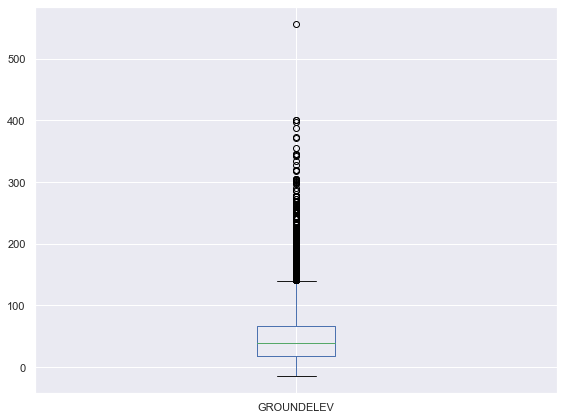

In [160]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['GROUNDELEV'].plot.box(ax=ax)
plt.tight_layout()
plt.savefig('figures/4-4-a')

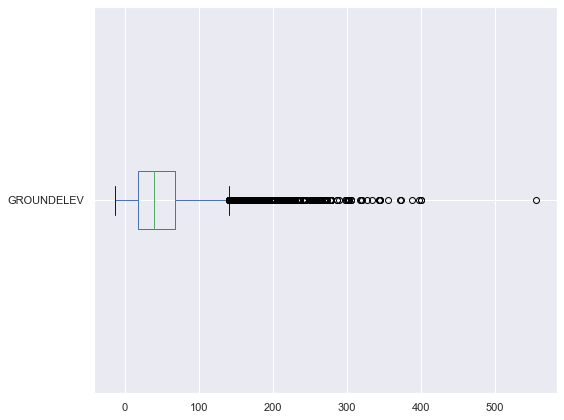

In [161]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['GROUNDELEV'].plot.box(vert=False, ax=ax)
plt.tight_layout()
plt.savefig('figures/4-4-b')

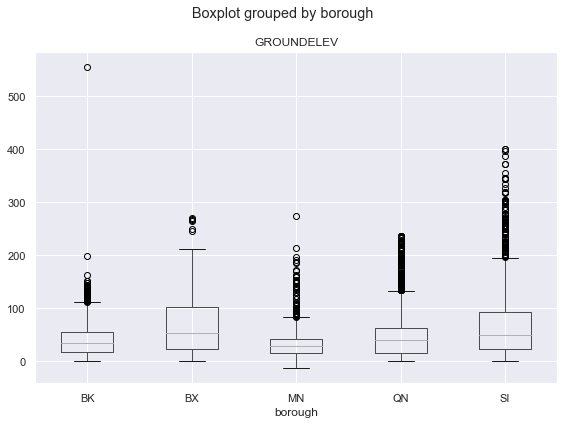

In [162]:
building_footprints_box = building_footprints[['borough', 'GROUNDELEV']]

fig, ax = plt.subplots(figsize=(8,6))

building_footprints_box.boxplot(by='borough', ax=ax)

plt.xlabel('borough')
plt.tight_layout()
plt.savefig('figures/4-4-c')

## Kernel Density Estimate Plot

In [163]:
building_footprints.head()

the_geom NAME      BIN  \
281   MULTIPOLYGON (((-73.98406915139554 40.75857096...  NaN  1022662   
1160  MULTIPOLYGON (((-73.87172426474349 40.65519420...  NaN  3394834   
1161  MULTIPOLYGON (((-73.87172426474349 40.65519420...  NaN  3394833   
1164  MULTIPOLYGON (((-73.86650099829305 40.74236058...  NaN  4540159   
1418  MULTIPOLYGON (((-73.91052614907707 40.56195839...  NaN  4607379   

      CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
281       2013.0  08/22/2017 12:00:00 AM  Constructed    633694       76.93   
1160      2011.0  08/22/2017 12:00:00 AM  Constructed   1250314       26.00   
1161      2011.0  12/07/2018 12:00:00 AM  Constructed   1250462       26.00   
1164      2010.0  08/22/2017 12:00:00 AM  Constructed    201366       28.00   
1418      2016.0  02/20/2018 12:00:00 AM  Constructed   1272716         NaN   

      FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
281      2100.0        49.0  ...      125.0   988630.0  215602.0  40.758453   
1160     2100.0        15.0  ...     1070.0  1019842.0  178007.0  40.655193   
1161     2100.0        15.0  ...     1070.0  1019842.0  178007.0  40.655193   
1164     2100.0        37.0  ...      411.0  1021273.0  209767.0  40.742361   
1418     2100.0         5.0  ...    91601.0  1006983.0  143913.0  40.561655   

      longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
281  -73.984190          1            5.0                  15.0          0.0   
1160 -73.871725          1            5.0                  33.0          0.0   
1161 -73.871725          1            5.0                  33.0          0.0   
1164 -73.866393          1            4.0                  42.0          0.0   
1418 -73.918184          1           14.0                  45.0          1.0   

      pfirm15_flag  
281            0.0  
1160           0.0  
1161           0.0  
1164           0.0  
1418           1.0  

[5 rows x 43 columns]

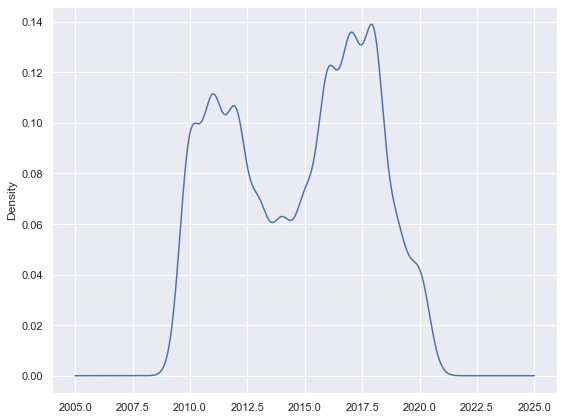

In [164]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['CNSTRCT_YR'].plot.kde(ax=ax)

plt.tight_layout()
plt.savefig('figures/4-5-a')

## Area Plot

In [165]:
area = pd.pivot_table(building_footprints, 
                      values='DOITT_ID', 
                      index=['CNSTRCT_YR'], 
                      columns = ['borough'], 
                      aggfunc=pd.Series.nunique)

area.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
area.index = area.index.astype('int64')
area.index = pd.to_datetime(area.index, format='%Y')
                             
area.head()

borough      BK   BX  MN   QN   SI
CNSTRCT_YR                        
2010-01-01  256  141  57  567  343
2011-01-01  266  100  42  628  451
2012-01-01  423   74  57  505  381
2013-01-01  258   50  60  348  183
2014-01-01  145   78  21  313  261

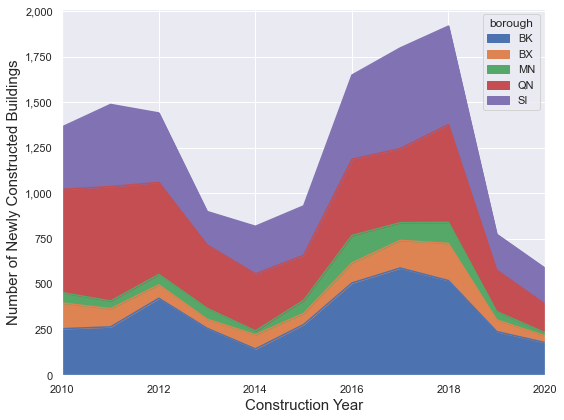

In [166]:
fig, ax = plt.subplots(figsize=(8,6))

area.plot.area(ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-6-a')

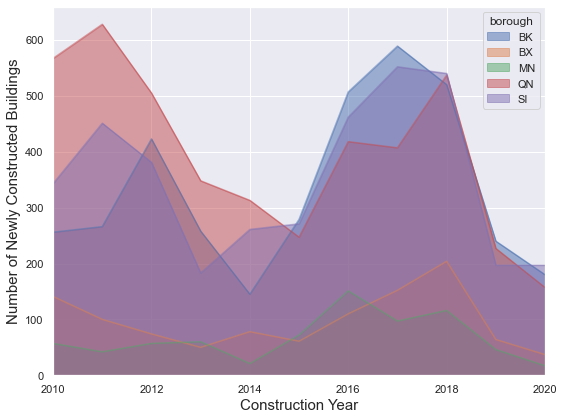

In [167]:
fig, ax = plt.subplots(figsize=(8,6))

area.plot.area(ax=ax, stacked=False)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-6-b')

In [168]:
area_cumsum = area.cumsum()
area_cumsum.head()

borough       BK   BX   MN    QN    SI
CNSTRCT_YR                            
2010-01-01   256  141   57   567   343
2011-01-01   522  241   99  1195   794
2012-01-01   945  315  156  1700  1175
2013-01-01  1203  365  216  2048  1358
2014-01-01  1348  443  237  2361  1619

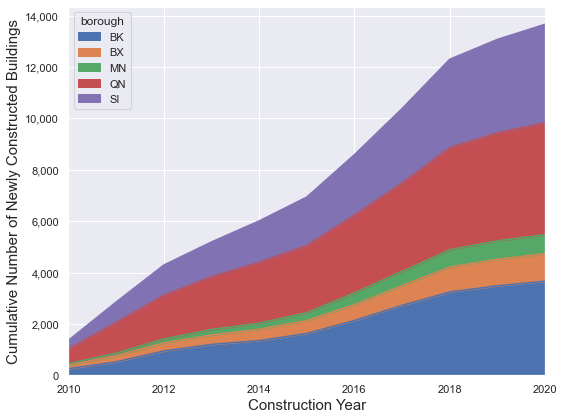

In [169]:
fig, ax = plt.subplots(figsize=(8,6))

area_cumsum.plot.area(ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Cumulative Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-6-c')

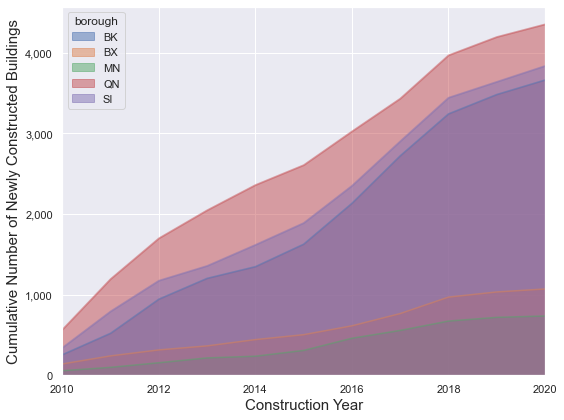

In [170]:
fig, ax = plt.subplots(figsize=(8,6))

area_cumsum.plot.area(ax=ax, stacked=False)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Cumulative Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-6-d')

## Scatter Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


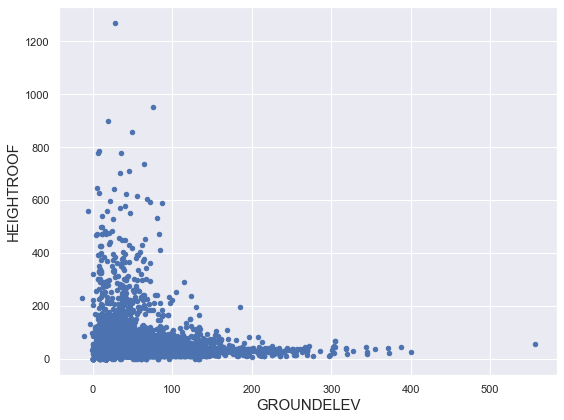

In [171]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.scatter(x='GROUNDELEV', 
                                 y='HEIGHTROOF', 
                                 ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-7-a')

In [172]:
mn = building_footprints.loc[(building_footprints['borough'].isin(["MN"]))]
bk = building_footprints.loc[(building_footprints['borough'].isin(["BK"]))]
bx = building_footprints.loc[(building_footprints['borough'].isin(["BX"]))]
qn = building_footprints.loc[(building_footprints['borough'].isin(["QN"]))]
si = building_footprints.loc[(building_footprints['borough'].isin(["SI"]))]

mn = mn[['GROUNDELEV', 'HEIGHTROOF']]
bk = bk[['GROUNDELEV', 'HEIGHTROOF']]
bx = bx[['GROUNDELEV', 'HEIGHTROOF']]
qn = qn[['GROUNDELEV', 'HEIGHTROOF']]
si = si[['GROUNDELEV', 'HEIGHTROOF']]

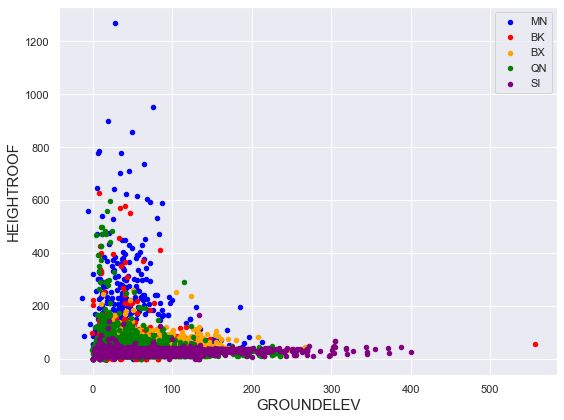

In [173]:
fig, ax = plt.subplots(figsize=(8,6))

mn.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='blue', label='MN', ax=ax)
bk.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='red', label='BK', ax=ax)
bx.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='orange', label='BX', ax=ax)
qn.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='green', label='QN', ax=ax)
si.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='purple', label='SI', ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-7-b')

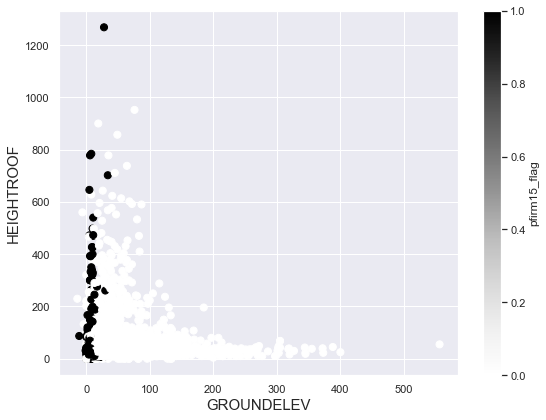

In [174]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.scatter(x='GROUNDELEV', 
                                 y='HEIGHTROOF', 
                                 c='pfirm15_flag', 
                                 s=50, 
                                 ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-7-c')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


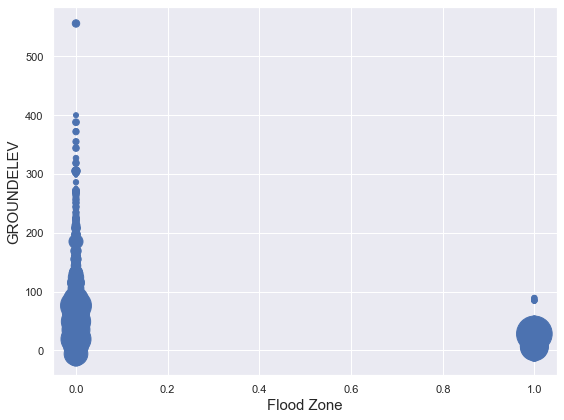

In [175]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.scatter(x='pfirm15_flag', 
                                 y='GROUNDELEV', 
                                 s=building_footprints['HEIGHTROOF'], 
                                 ax=ax)

plt.xlabel('Flood Zone', fontsize=15)
plt.ylabel('GROUNDELEV', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-7-d')

## Hexagonal Bin Plot

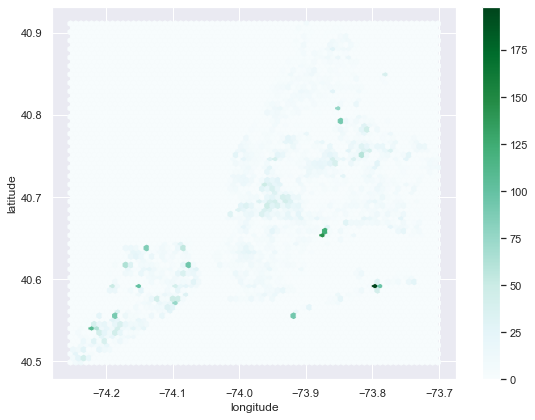

In [176]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                gridsize=70, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/4-8-a')

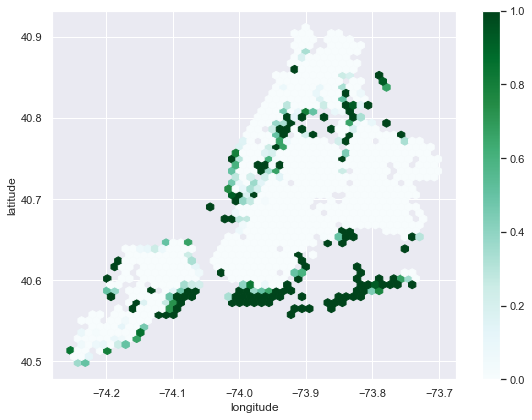

In [177]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                C='pfirm15_flag', 
                                gridsize=50, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/4-8-b')

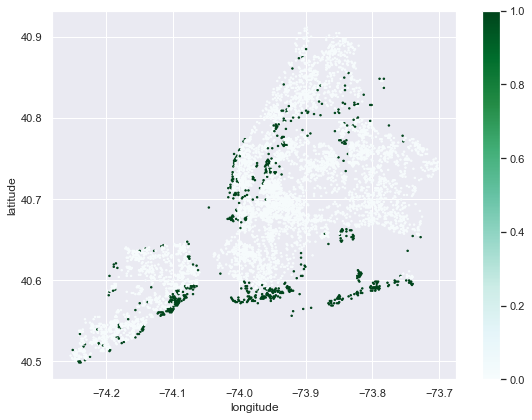

In [178]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                C='pfirm15_flag', 
                                reduce_C_function=np.max, 
                                gridsize=255, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/4-8-c')

## Pie Plot

In [179]:
pie = building_footprints.groupby('borough')['DOITT_ID'].count()
pie.rename("count", inplace=True)
pie.sort_values(ascending=False, inplace=True)
pie

borough
QN    4354
SI    3838
BK    3663
BX    1071
MN     736
Name: count, dtype: int64

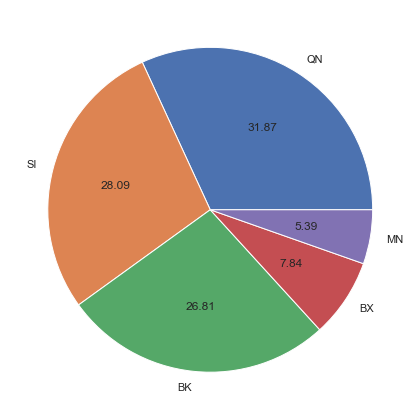

In [180]:
ax = pie.plot.pie(figsize=(8,6), 
                  autopct='%.2f') 

ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('figures/4-9-a')

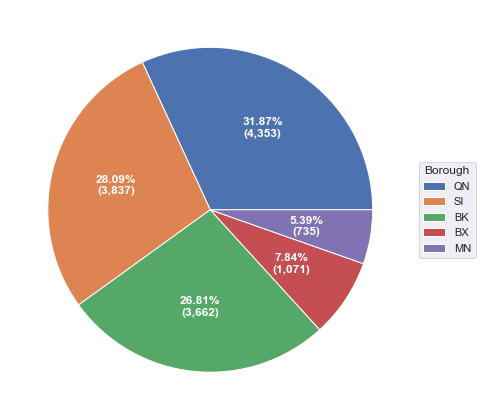

In [181]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(pie, 
                                  autopct=lambda pct: func(pct, pie),
                                  textprops=dict(color="w"))

ax.legend(wedges, 
          pie.index,
          title="Borough",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) 

plt.setp(autotexts, size=12, weight="bold")
plt.tight_layout()
plt.savefig('figures/4-9-b')

# 5. Conclusion

In this notebook, we reviewed various types of plots and visualizations using the Python libraries seaborn and pandas, both built on top of the library matplotlib. In Part IV, we will demonstrate how to work with geospatial data and create various types of maps with the Python library geopandas.